# Dataset Characteristics

Vorbereitung: Import der notwendigen Libraries und Laden des Datensatzes


In [1]:
# Import der Libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import norm
import scipy.stats as stats
import numpy as np
import seaborn as sns
import missingno as msno
from fancyimpute import IterativeImputer, KNN

# Laden des gesamten Datensatzes
dataf = pd.read_csv("https://raw.githubusercontent.com/FabsenMc/bakery_prediction/main/0_DataPreparation/dataf.csv")

In [2]:
print("Ersten Zeilen des Datensatzes:")
print(dataf.head())

Ersten Zeilen des Datensatzes:
        Datum  KielerWoche  Warengruppe  Umsatz  Bewoelkung  Temperatur  \
0  2012-01-01            0          NaN     NaN         8.0      9.8250   
1  2012-01-02            0          NaN     NaN         7.0      7.4375   
2  2012-01-03            0          NaN     NaN         8.0      5.5375   
3  2012-01-04            0          NaN     NaN         4.0      5.6875   
4  2012-01-05            0          NaN     NaN         6.0      5.3000   

   Windgeschwindigkeit  Wettercode                    Beschreibung  FerienSH  \
0                 14.0        58.0  leichter Spruehregen mit Regen       1.0   
1                 12.0         NaN                             NaN       1.0   
2                 18.0        63.0     durchgehend maessiger Regen       1.0   
3                 19.0        80.0           leichter Regenschauer       1.0   
4                 23.0        80.0           leichter Regenschauer       1.0   

   ...  Umschlag Weihnachtsmarkt Verb

In [4]:
# Umwandeln der Variablen in kategorielle falls notwendig
categorical_columns = ['KielerWoche', 'Weihnachtsmarkt', 'Umschlag', 'Feiertag', 'FerienSH',
                       'Warengruppe', 'Wochentag_MDMDFSS', 'Wochenende', 'Regen', 'Schnee',
                       'Jahreszeit_FSHW', 'THW_heimspiel']

# Konvertiere die Spalten zu kategorischen Variablen
dataf[categorical_columns] = dataf[categorical_columns].astype('category')
print(dataf.dtypes)

Datum                      object
KielerWoche              category
Warengruppe              category
Umsatz                    float64
Bewoelkung                float64
Temperatur                float64
Windgeschwindigkeit       float64
Wettercode                float64
Beschreibung               object
FerienSH                 category
Feiertag                 category
Uhrzeit                    object
Heim_Auswärts              object
Umschlag                 category
Weihnachtsmarkt          category
Verbraucherpreisindex     float64
Regen                    category
Schnee                   category
Wochentag_MDMDFSS        category
Wochenende               category
Jahreszeit_FSHW          category
Temperatur_Kategorie       object
THW_heimspiel            category
dtype: object


## Allgemeine Übersicht über den Datensatz

Beschreibung und allgemeine Zusammenfassung des Datensatzes

In [5]:

print(f"Anzahl der Reihen: {dataf.shape[0]}")
print(f"Anzahl der Spalten: {dataf.shape[1]}")
print("\nSpaltennamen und Datentypen:")
print(dataf.dtypes)
print("\nVorschau des Datensatzes:")
print(dataf.head())


Anzahl der Reihen: 10437
Anzahl der Spalten: 23

Spaltennamen und Datentypen:
Datum                      object
KielerWoche              category
Warengruppe              category
Umsatz                    float64
Bewoelkung                float64
Temperatur                float64
Windgeschwindigkeit       float64
Wettercode                float64
Beschreibung               object
FerienSH                 category
Feiertag                 category
Uhrzeit                    object
Heim_Auswärts              object
Umschlag                 category
Weihnachtsmarkt          category
Verbraucherpreisindex     float64
Regen                    category
Schnee                   category
Wochentag_MDMDFSS        category
Wochenende               category
Jahreszeit_FSHW          category
Temperatur_Kategorie       object
THW_heimspiel            category
dtype: object

Vorschau des Datensatzes:
        Datum KielerWoche Warengruppe  Umsatz  Bewoelkung  Temperatur  \
0  2012-01-01           0 

### Missing Values
Übersicht und Identifizieren von Missing Values 

In [6]:
print("\nMissing Values")
print("----------------")
missing_values = dataf.isnull().sum()
print(missing_values[missing_values > 0])


Missing Values
----------------
Warengruppe              1103
Umsatz                   1103
Bewoelkung                389
Temperatur                334
Windgeschwindigkeit       334
Wettercode               2856
Beschreibung             2856
FerienSH                   38
Feiertag                   38
Uhrzeit                  9531
Heim_Auswärts            9526
Verbraucherpreisindex      30
Temperatur_Kategorie      335
dtype: int64


### Darstellung der Missing Values für spätere Missing Value Imputation

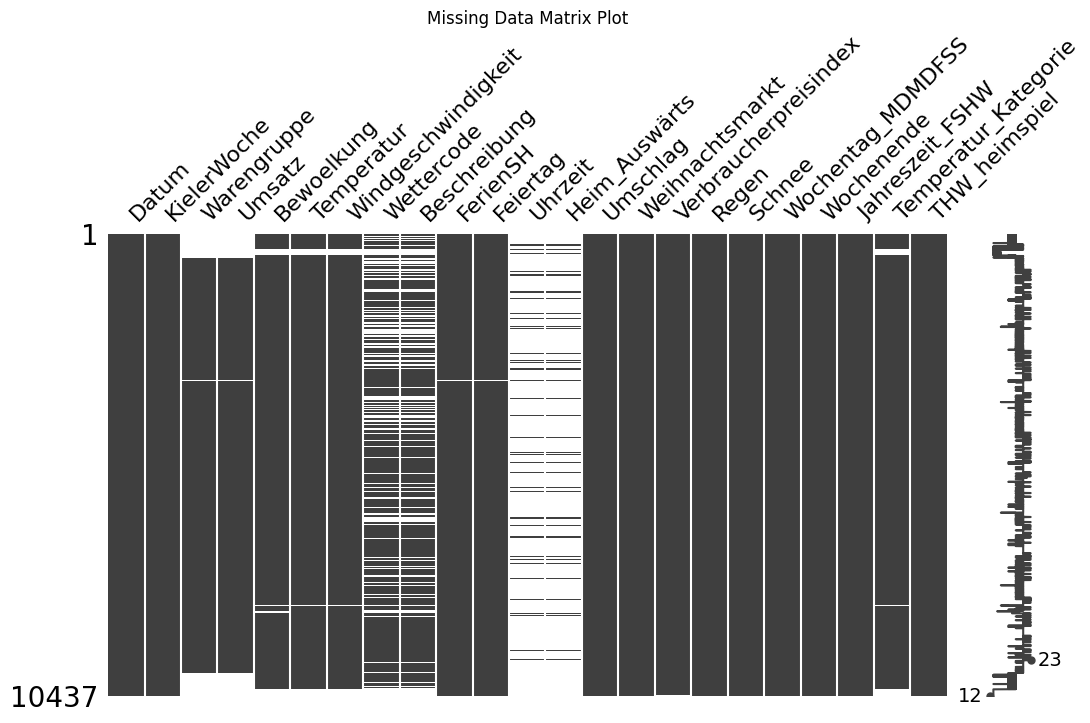

In [37]:
# Matrix plot der Missing Values
msno.matrix(dataf, figsize=(12, 6))
plt.title('Missing Data Matrix Plot')
plt.show()

/home/codespace/.python/current/lib/python3.10/site-packages/missingno/missingno.py:271: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)


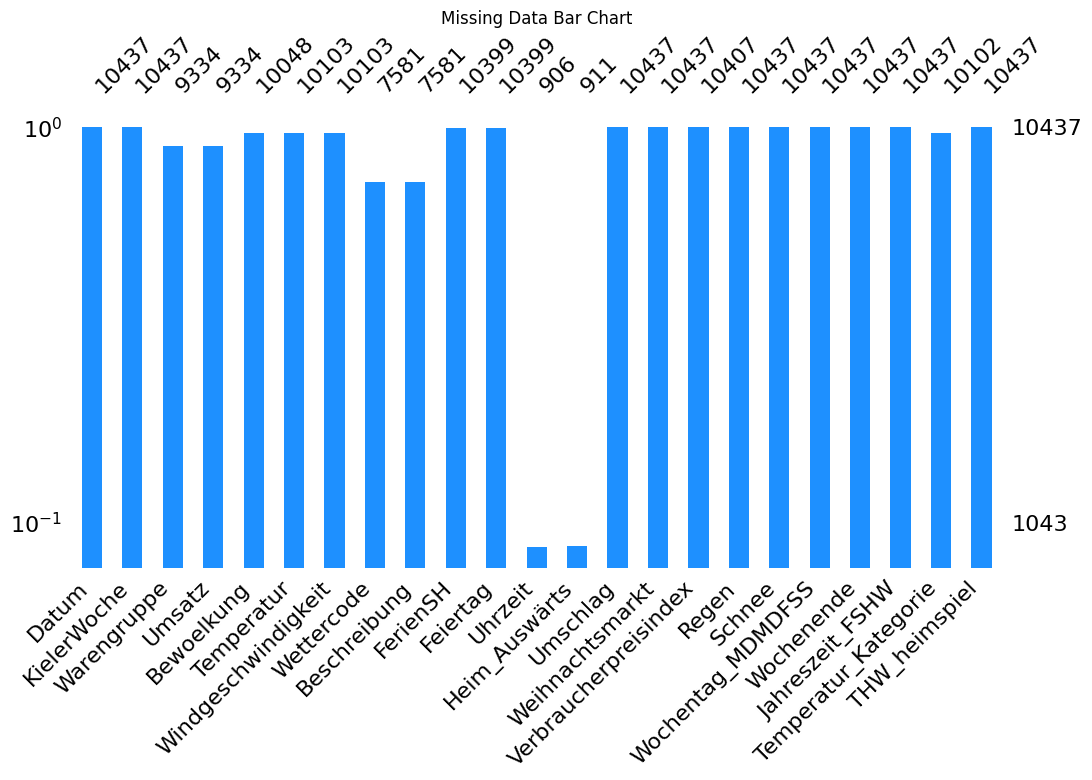

In [38]:
# Balkendiagramm der Missing Values
msno.bar(dataf, color="dodgerblue", log=True, figsize=(12, 6))
plt.title('Missing Values Balkendiagramm')
plt.show()

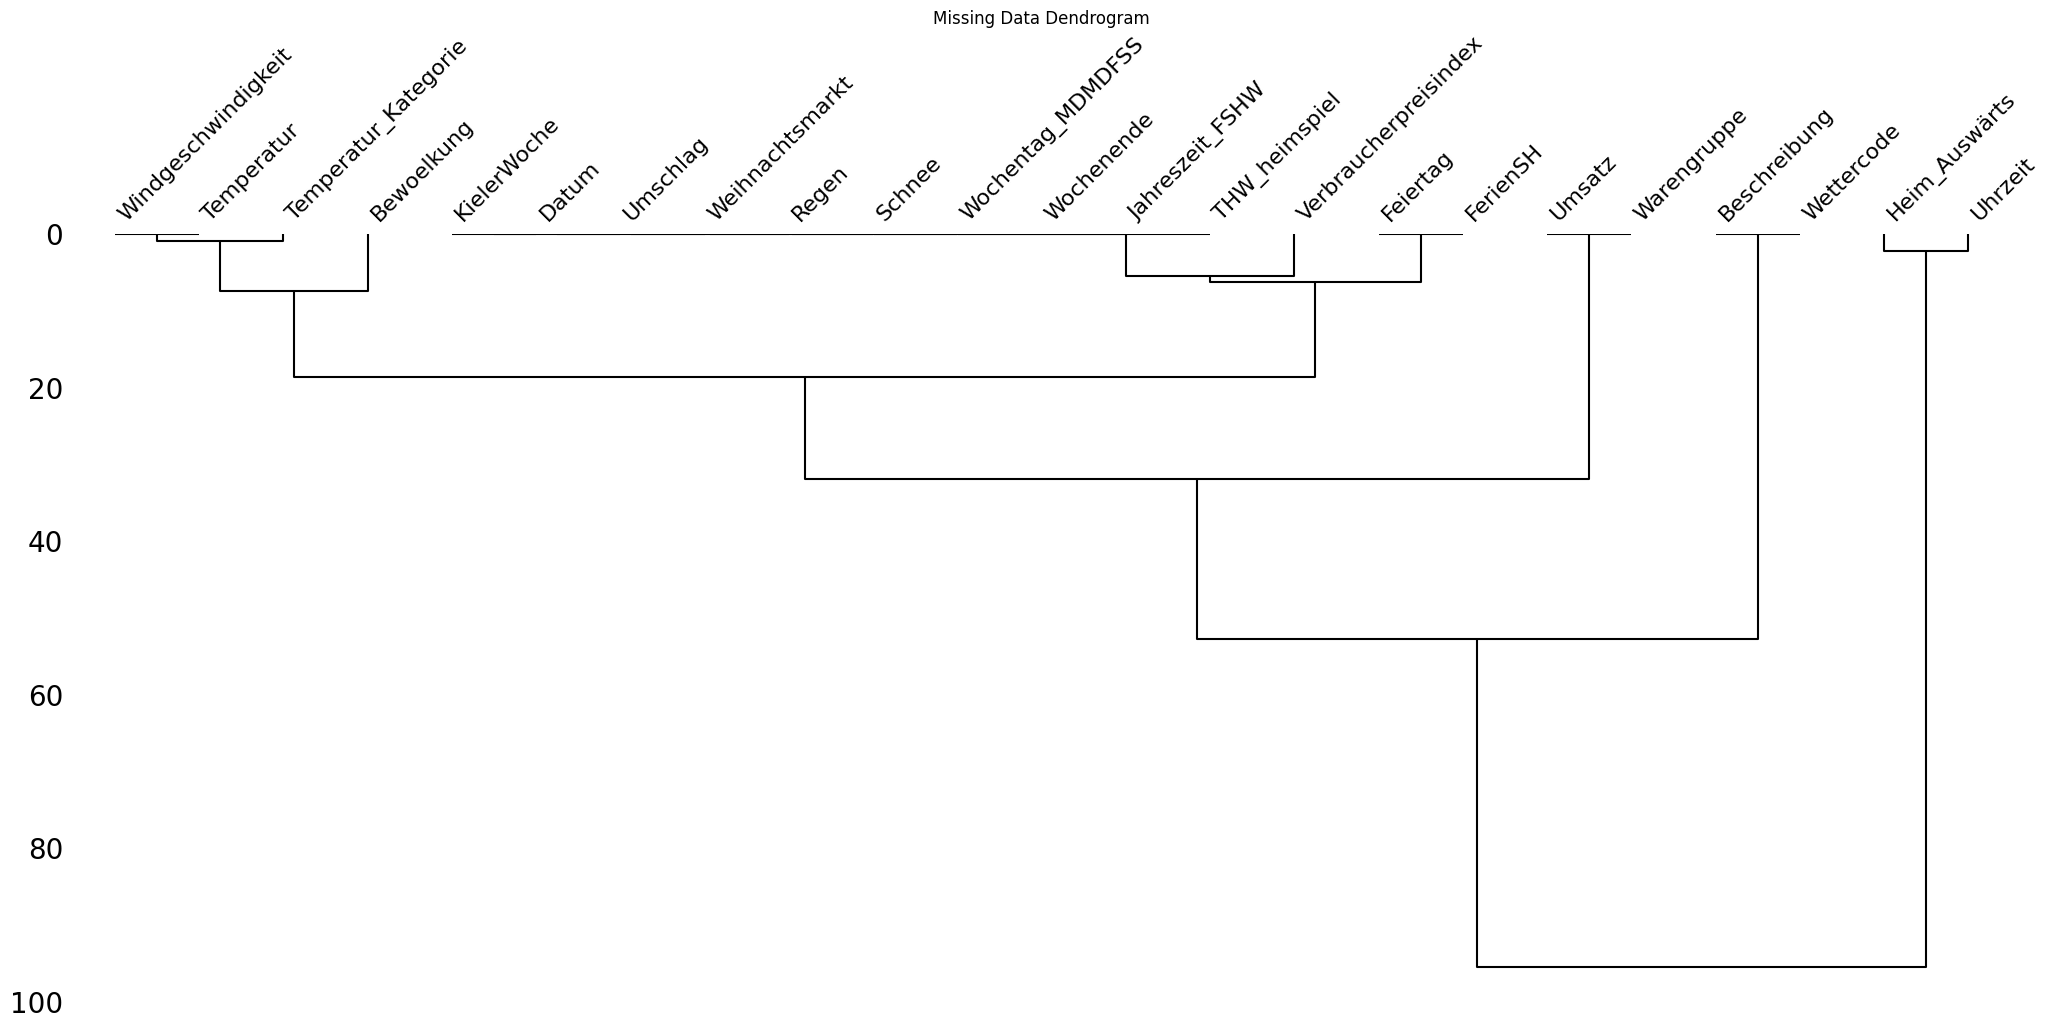

In [39]:
# Dendrogram to visualize the correlation of missingness between variables
msno.dendrogram(dataf)
plt.title('Missing Data Dendrogram')
plt.show()

# Visualisierung der einzelnen Features/ Variablen zunächst in Form eines Histograms / Balekndiagramms und der Häufigeit, zusätzlich Darstellung der Features in Abhängigkeit der Zielvariable Umsatz

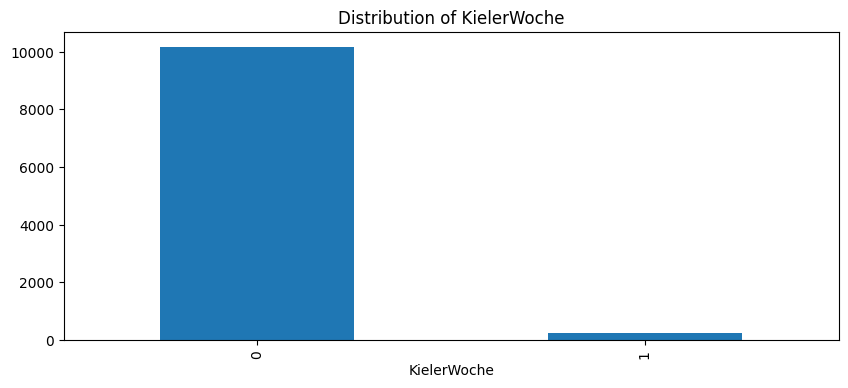

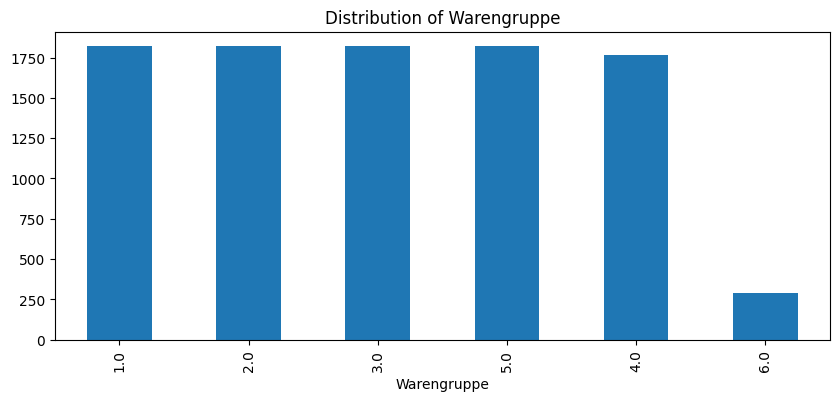

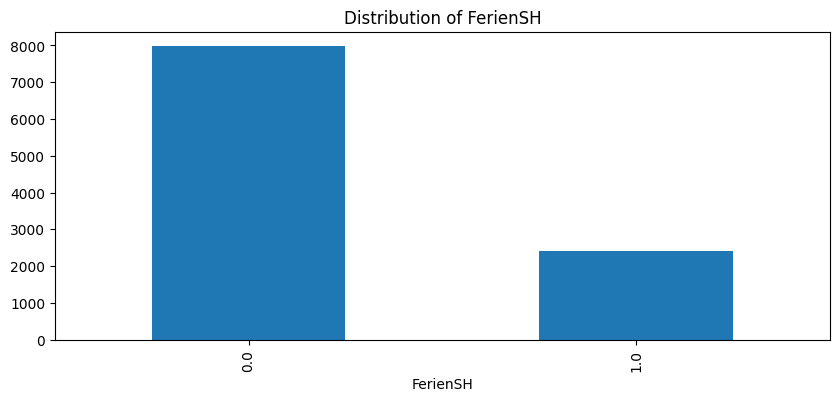

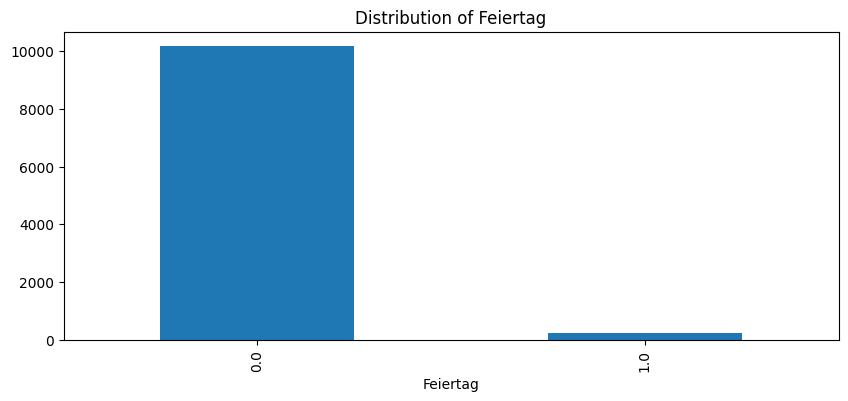

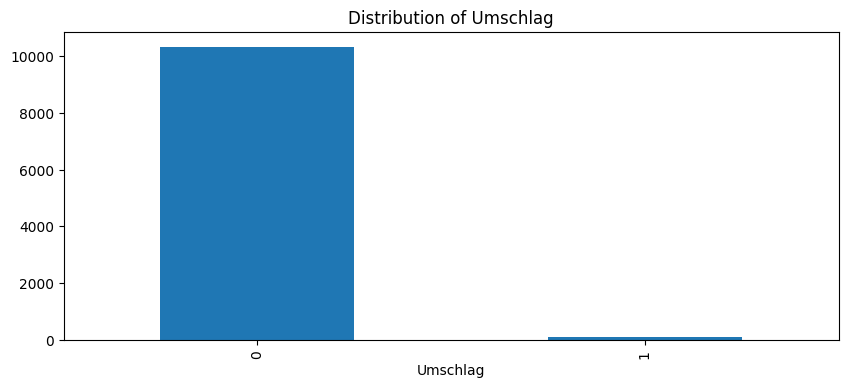

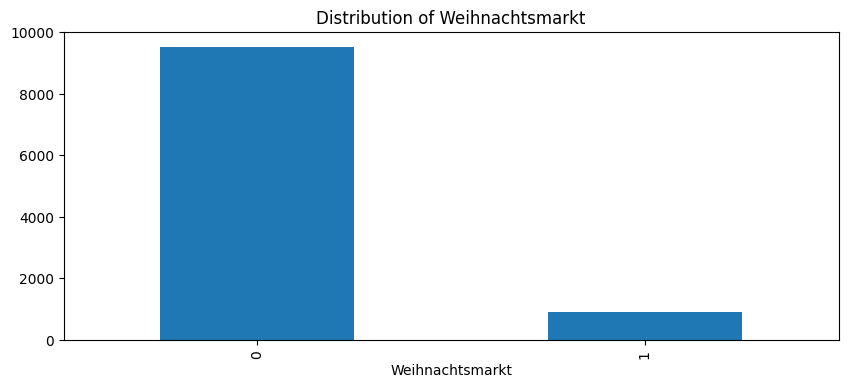

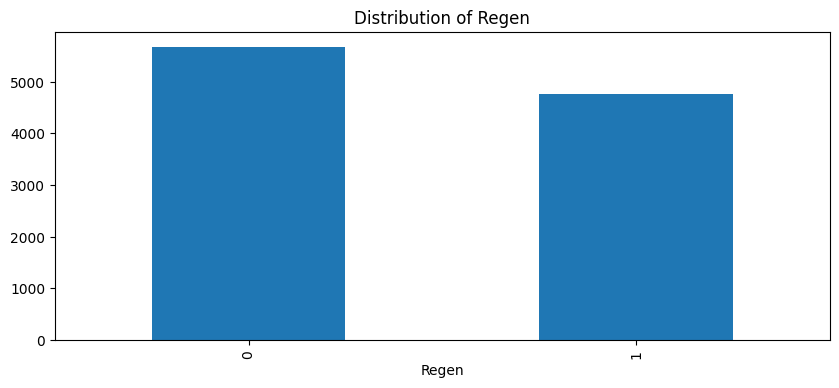

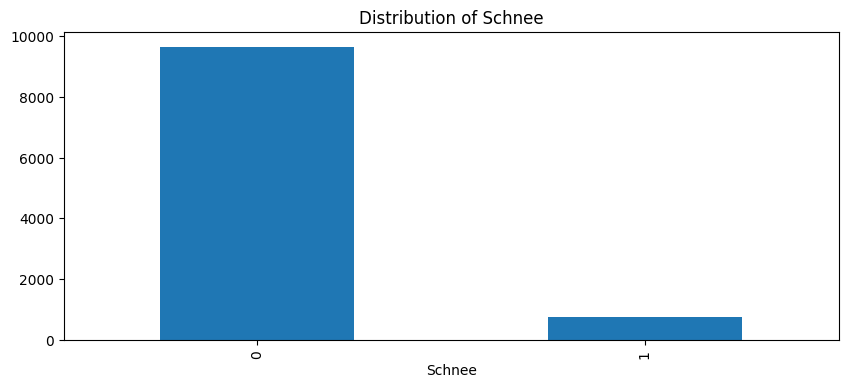

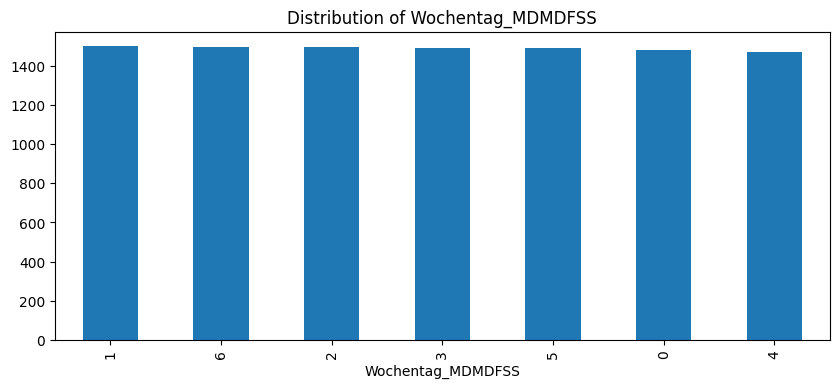

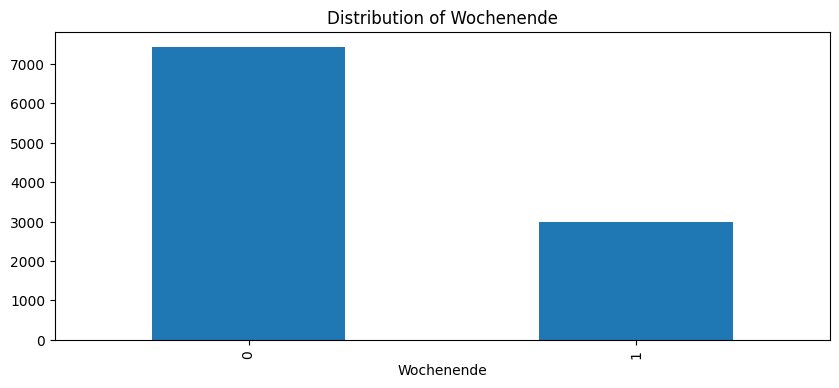

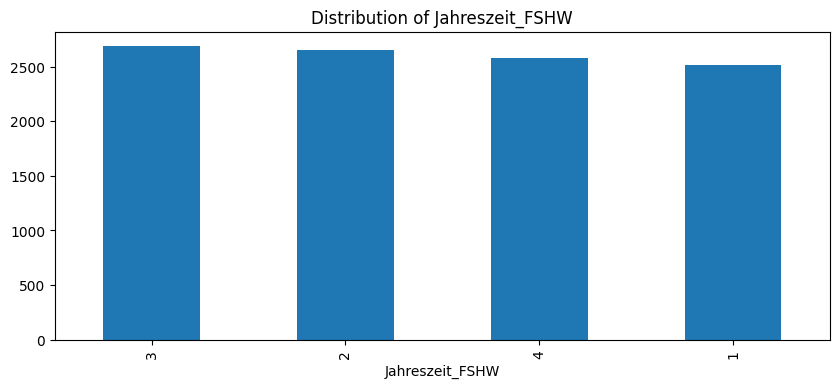

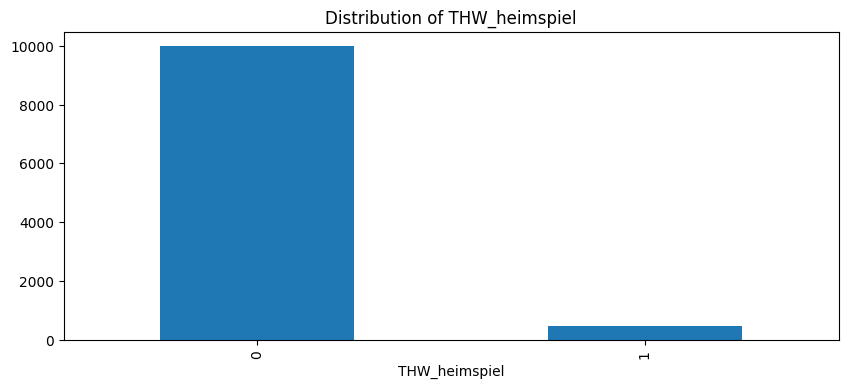

In [7]:
# Verteilung der kategoriellen features
categorical_features = dataf.select_dtypes(include=['category'])
for column in categorical_features.columns:
    plt.figure(figsize=(10, 4))
    dataf[column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.show()

## Temperatur
### Deskriptive Statistik und Darstellung der Variable Temperatur als Histogramm

Deskriptive Statistik für Temperatur:
count    10103.000000
mean        12.014560
std          7.212466
min        -10.250000
25%          6.250000
50%         11.625000
75%         17.875000
max         32.671428
Name: Temperatur, dtype: float64


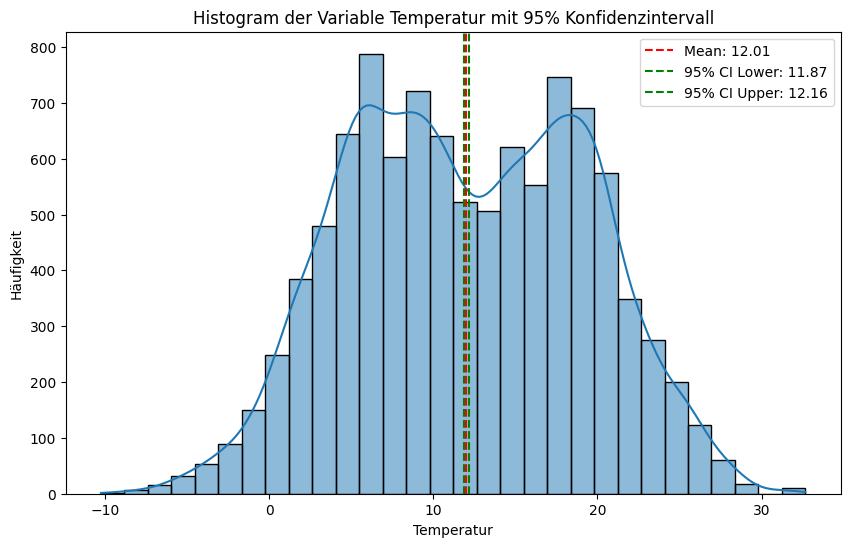

In [41]:
# Deskriptive Statistik für Temperatur
print("Deskriptive Statistik für Temperatur:")
desc = dataf['Temperatur'].describe()
print(desc)

# Berechnen des Konfidenzintervalls für den Mittelwert
confidence_level = 0.95
degrees_freedom = len(dataf['Temperatur'].dropna()) - 1
sample_mean = np.mean(dataf['Temperatur'].dropna())
sample_standard_error = stats.sem(dataf['Temperatur'].dropna())
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)

# Histogram für Temperatur mit Konfidenzintervall
plt.figure(figsize=(10, 6))
sns.histplot(dataf['Temperatur'].dropna(), bins=30, kde=True)
plt.axvline(sample_mean, color='red', linestyle='--', label=f'Mean: {sample_mean:.2f}')
plt.axvline(confidence_interval[0], color='green', linestyle='--', label=f'95% CI Lower: {confidence_interval[0]:.2f}')
plt.axvline(confidence_interval[1], color='green', linestyle='--', label=f'95% CI Upper: {confidence_interval[1]:.2f}')
plt.title('Histogram der Variable Temperatur mit 95% Konfidenzintervall')
plt.xlabel('Temperatur')
plt.ylabel('Häufigkeit')
plt.legend()
plt.show()


#### Scatterplot zwischen der Variable Umsatz in Abhängikeit von der Variable Temperatur

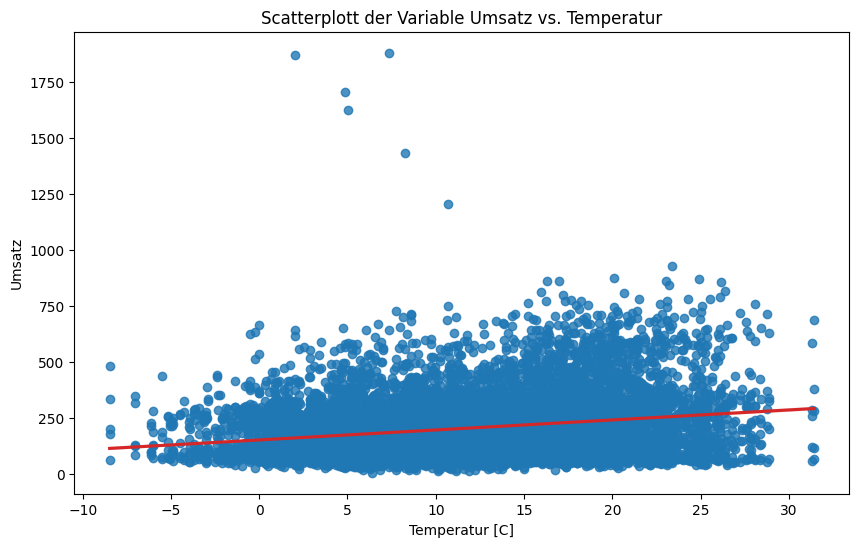

In [43]:
# Darstellung des Features Temperatur in Abhängigkeit des Umsatzes in Form eines Scatterplots
plt.figure(figsize=(10, 6))
sns.regplot(x='Temperatur', y='Umsatz', data=dataf.dropna(subset=['Temperatur']),
            scatter_kws={'color': 'C0'},
            line_kws={'color': 'C3'})
plt.title('Scatterplott der Variable Umsatz vs. Temperatur')
plt.xlabel('Temperatur [C]')
plt.ylabel('Umsatz')
plt.show()

### Deskriptive Statistik und Darstellung der Variable Temperatur als Histogramm

Deskriptive Statistik für Temperatur_Kategorie:
Unique values: 3
Mode: Niedrig
Häufigkeit:
Temperatur_Kategorie
Niedrig    4354
Mittel     4253
Hoch       1495
Name: count, dtype: int64
Relative Häufigkeit:
Temperatur_Kategorie
Niedrig    0.431004
Mittel     0.421006
Hoch       0.147990
Name: proportion, dtype: float64


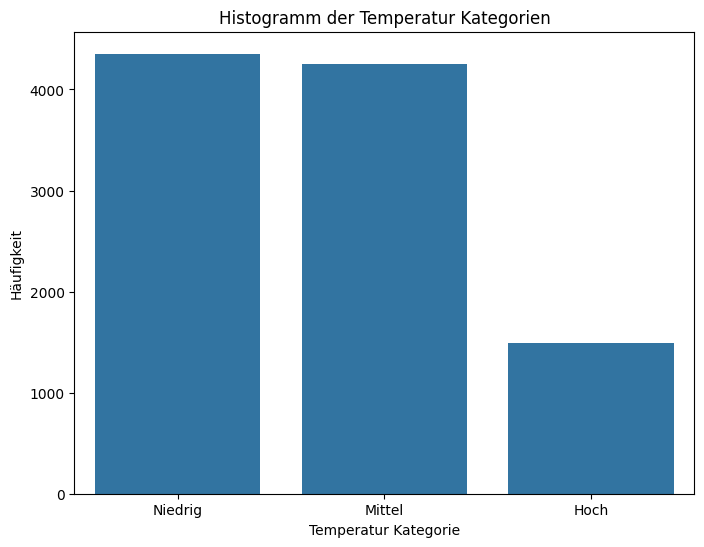

In [47]:
# Deskriptive Statistik für Temperatur_Kategorie
print("Deskriptive Statistik für Temperatur_Kategorie:")
print(f"Unique values: {dataf['Temperatur_Kategorie'].nunique()}")
print(f"Mode: {dataf['Temperatur_Kategorie'].mode()[0]}")
freq_counts = dataf['Temperatur_Kategorie'].value_counts()
relative_freq = dataf['Temperatur_Kategorie'].value_counts(normalize=True)
print(f"Häufigkeit:\n{freq_counts}")
print(f"Relative Häufigkeit:\n{relative_freq}")

# Erstellen des Histograms für Temperatur Kategorien
plt.figure(figsize=(8, 6))
sns.countplot(data=dataf, x='Temperatur_Kategorie', order=['Niedrig', 'Mittel', 'Hoch'])
plt.xlabel('Temperatur Kategorie')
plt.ylabel('Häufigkeit')
plt.title('Histogramm der Temperatur Kategorien')
plt.show()


#### Balkendiagramm des Umsatzes in Relation zur Variable Temperatur_Kategorie

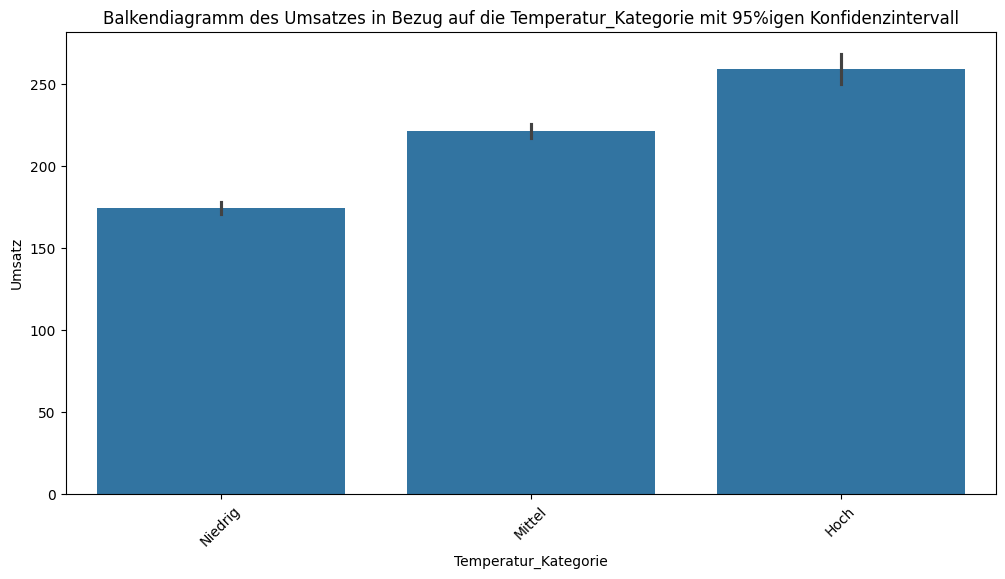

In [49]:
plt.figure(figsize=(12, 6))
# Plotten des Umsatzes mit Warengruppe mit KI 'Warengruppe'
sns.barplot(x='Temperatur_Kategorie', y='Umsatz', data=dataf, errorbar=('ci', 95))

plt.title('Balkendiagramm des Umsatzes in Bezug auf die Temperatur_Kategorie mit 95%igen Konfidenzintervall')
plt.xlabel('Temperatur_Kategorie')
plt.ylabel('Umsatz')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

## Umsatz 
Numerische Variable

Descriptive Statistics for Umsatz:
count    9334.000000
mean      206.749044
std       144.545189
min         7.051201
25%        96.897441
50%       161.900831
75%       280.644663
max      1879.461831
Name: Umsatz, dtype: float64
Median: 161.9008308979695
95% Confidence interval for the median: (158.2267760206901, 165.57488577524893)


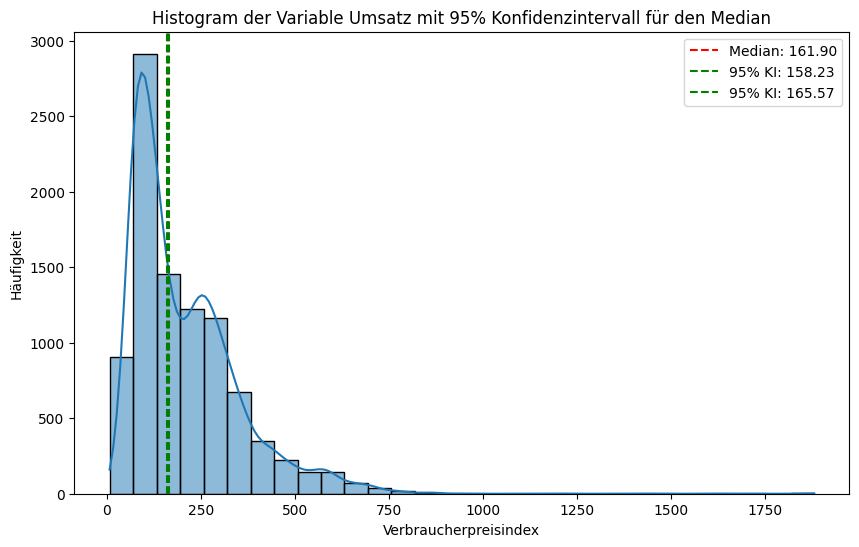

In [50]:
#plt.hist(dataf['Umsatz'], bins=30)
## Hinzufügen von Titeln und Labels
#plt.title('Histogramm Umsatz')
#plt.xlabel('Umsatz')
#plt.ylabel('Häufigkeit')
#plt.show()

# Deskriptive Statistik für Umsatz
print("Deskriptive Statistik für Umsatz:")
desc = dataf['Umsatz'].describe()
print(desc)

# Berechnung des Medians
data_clean = dataf['Umsatz'].dropna().values
median = np.median(data_clean)

# Berechnung des Konfidenzintervalls für den Median
confidence_level = 0.95
z = stats.norm.ppf(1 - (1 - confidence_level) / 2)
n = len(data_clean)
se_median = 1.253 * (np.std(data_clean) / np.sqrt(n))
lower_ci = median - z * se_median
upper_ci = median + z * se_median

print(f"Median: {median}")
print(f"95% Confidence interval for the median: ({lower_ci}, {upper_ci})")

# Histogram für Umsatz mit Konfidenzintervall
plt.figure(figsize=(10, 6))
sns.histplot(data_clean, bins=30, kde=True)
plt.axvline(median, color='red', linestyle='--', label=f'Median: {median:.2f}')
plt.axvline(lower_ci, color='green', linestyle='--', label=f'95% KI: {lower_ci:.2f}')
plt.axvline(upper_ci, color='green', linestyle='--', label=f'95% KI: {upper_ci:.2f}')
plt.title('Histogram der Variable Umsatz mit 95% Konfidenzintervall für den Median')
plt.xlabel('Verbraucherpreisindex')
plt.ylabel('Häufigkeit')
plt.legend()
plt.show()

## Warengruppe 
Kategorielle Variable

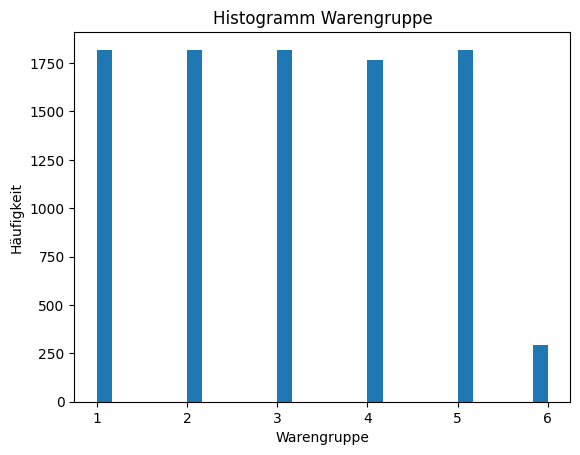

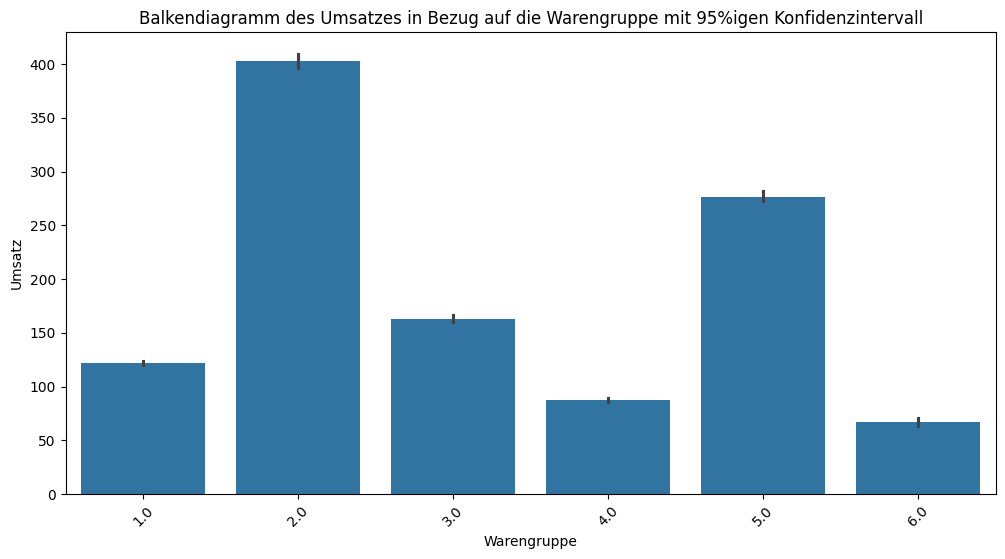

In [51]:
# Warengruppe
plt.hist(dataf['Warengruppe'].dropna(), bins=30)
# Hinzufügen von Titeln und Labels
plt.title('Histogramm Warengruppe')
plt.xlabel('Warengruppe')
plt.ylabel('Häufigkeit')
plt.show()

# Darstellung der Variable Warengruppe in Relation zum Umsatz als Balkendiagramm mit 95% Konfidenzintervall

plt.figure(figsize=(12, 6))
# Plotten des Umsatzes mit Warengruppe mit KI 'Warengruppe'
sns.barplot(x='Warengruppe', y='Umsatz', data=dataf, errorbar=('ci', 95))

plt.title('Balkendiagramm des Umsatzes in Bezug auf die Warengruppe mit 95%igen Konfidenzintervall')
plt.xlabel('Warengruppe')
plt.ylabel('Umsatz')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

## Windgeschwindigkeit
Numerische Variable

Deskriptive Statistik für Variable Windgeschwindigkeit:
count    10103.000000
mean        11.026527
std          4.131774
min          3.000000
25%          8.000000
50%         10.000000
75%         13.000000
max         35.000000
Name: Windgeschwindigkeit, dtype: float64
95% Confidence interval for the mean of VPI: (10.94594969031403, 11.107103858136924)


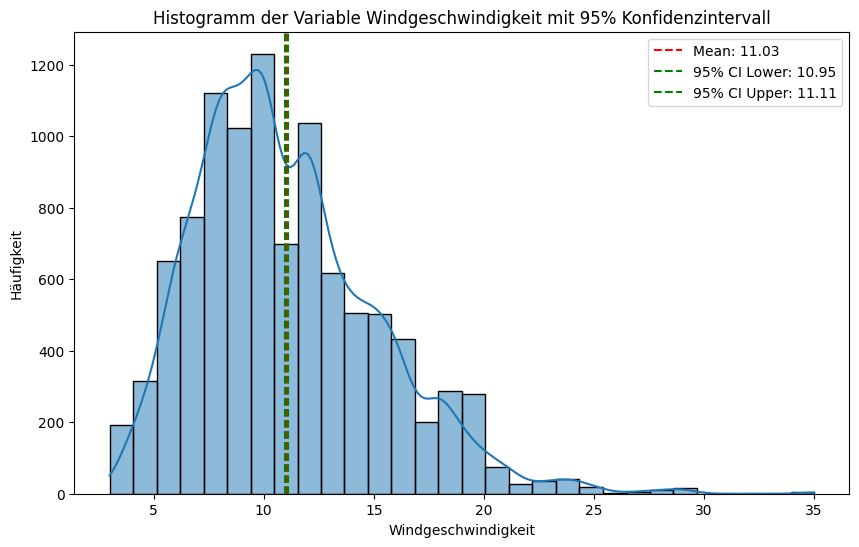

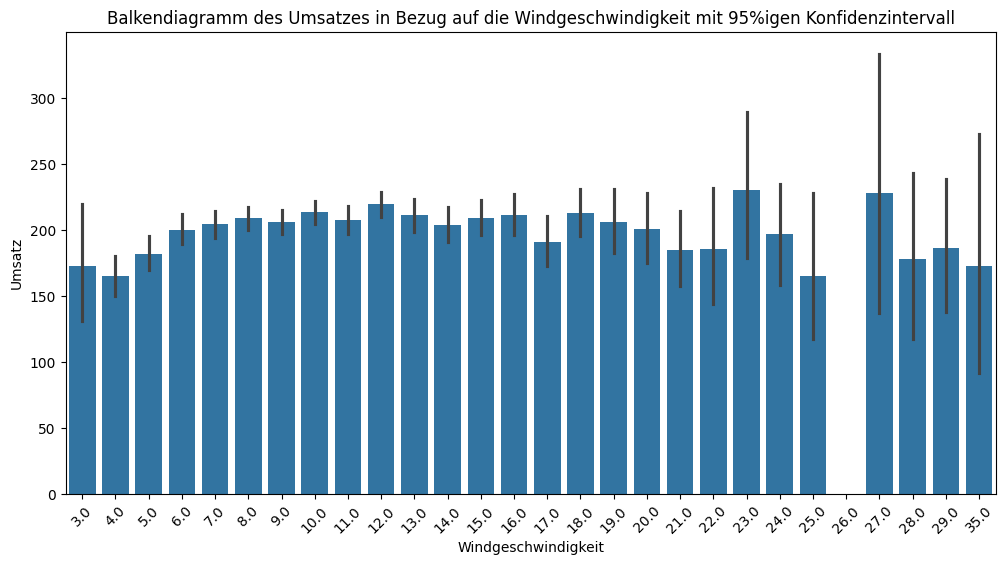

In [26]:
# Deskriptive Statistics for Windgeschwindigkeit
print("Deskriptive Statistik für Variable Windgeschwindigkeit:")
desc = dataf['Windgeschwindigkeit'].describe()
print(desc)

## Darstellung der Variable Windgeschwindigkeit mit Konfidenzintervall als Histogramm  
# Berechnen des Konfidenzintervalls
confidence_level = 0.95
degrees_freedom = len(dataf['Windgeschwindigkeit'].dropna()) - 1
sample_mean = np.mean(dataf['Windgeschwindigkeit'].dropna())
sample_standard_error = stats.sem(dataf['Windgeschwindigkeit'].dropna())
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)

print(f"95% Confidence interval for the mean of VPI: {confidence_interval}")

# Histogram für Temperatur mit Confidence Interval
plt.figure(figsize=(10, 6))
sns.histplot(dataf['Windgeschwindigkeit'].dropna(), bins=30, kde=True)
plt.axvline(sample_mean, color='red', linestyle='--', label=f'Mean: {sample_mean:.2f}')
plt.axvline(confidence_interval[0], color='green', linestyle='--', label=f'95% CI Lower: {confidence_interval[0]:.2f}')
plt.axvline(confidence_interval[1], color='green', linestyle='--', label=f'95% CI Upper: {confidence_interval[1]:.2f}')
plt.title('Histogramm der Variable Windgeschwindigkeit mit 95% Konfidenzintervall')
plt.xlabel('Windgeschwindigkeit')
plt.ylabel('Häufigkeit')
plt.legend()
plt.show()


# Darstellung der Variable Windgeschwindigkeit in Relation zum Umsatz als Balkendiagramm mit 95% Konfidenzintervall
plt.figure(figsize=(12, 6))
# Plotten des Umsatzes mit Windgeschwindigkeit mit KI
sns.barplot(x='Windgeschwindigkeit', y='Umsatz', data=dataf, errorbar=('ci', 95))

plt.title('Balkendiagramm des Umsatzes in Bezug auf die Windgeschwindigkeit mit 95%igen Konfidenzintervall')
plt.xlabel('Windgeschwindigkeit')
plt.ylabel('Umsatz')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()


## Wettercode
Kategorielle Variable

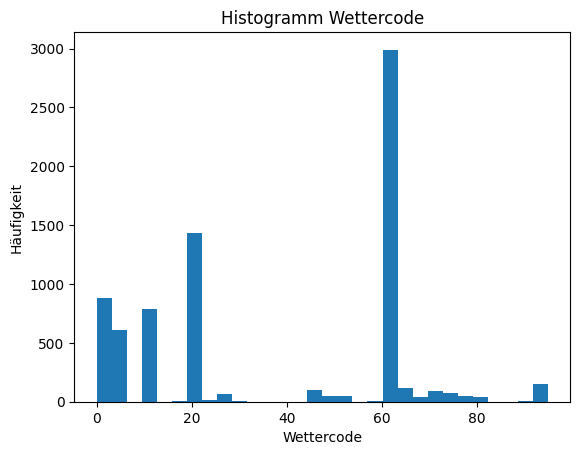

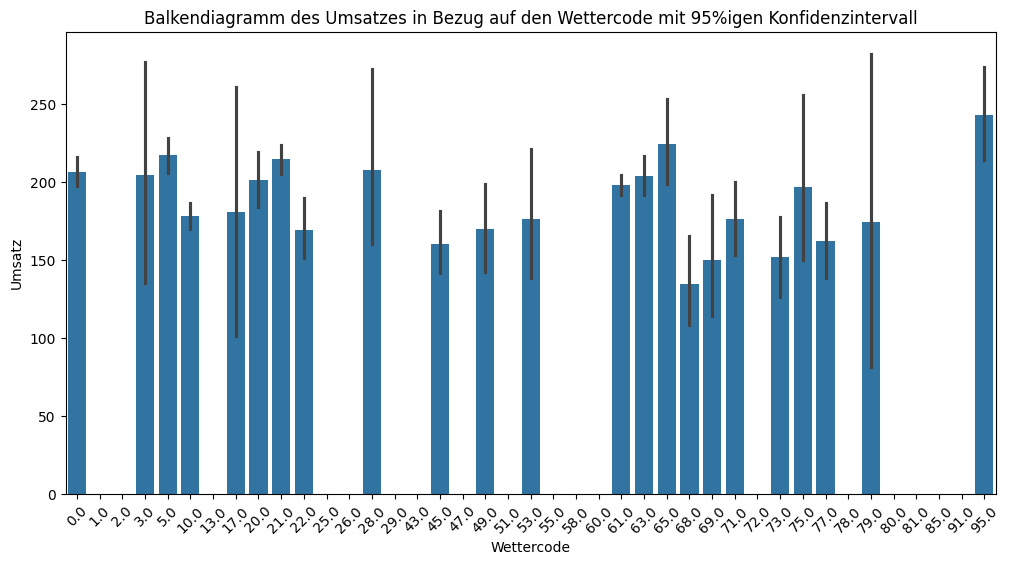

In [27]:
# Wettercode - Kategorielle Variable
plt.hist(dataf['Wettercode'].dropna(), bins=30)
# Hinzufügen von Titeln und Labels
plt.title('Histogramm Wettercode')
plt.xlabel('Wettercode')
plt.ylabel('Häufigkeit')
plt.show()

# Darstellung der Variable Wettercode in Relation zum Umsatz als Balkendiagramm mit 95% Konfidenzintervall
plt.figure(figsize=(12, 6))
# Plotten des Umsatzes mit Windgeschwindigkeit mit KI
sns.barplot(x='Wettercode', y='Umsatz', data=dataf, errorbar=('ci', 95))

plt.title('Balkendiagramm des Umsatzes in Bezug auf den Wettercode mit 95%igen Konfidenzintervall')
plt.xlabel('Wettercode')
plt.ylabel('Umsatz')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

## Verbraucherpreisindex
Numerische Variable

Descriptive Statistics for Verbraucherpreisindex:
count    10407.000000
mean        95.147036
std          1.738300
min         90.600000
25%         93.900000
50%         94.900000
75%         96.400000
max        100.300000
Name: Verbraucherpreisindex, dtype: float64
95% Confidence interval for the mean of VPI: (95.11363455858907, 95.18043673957561)


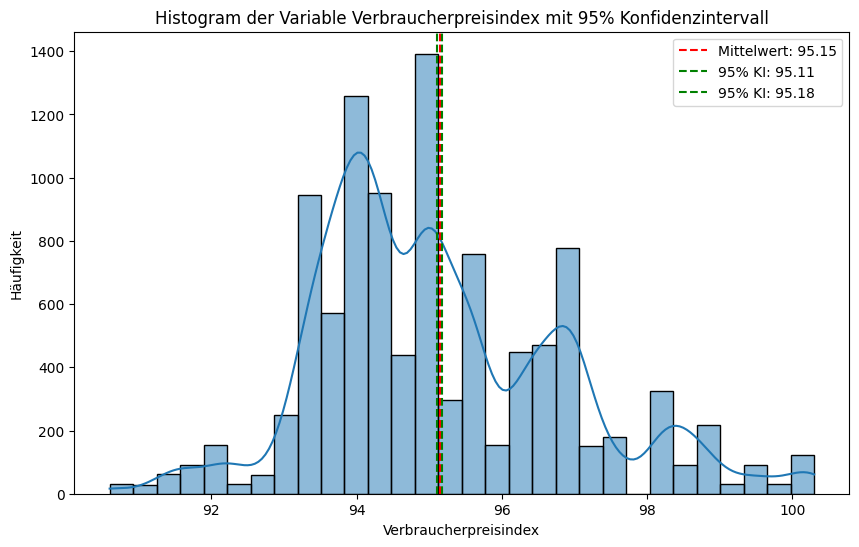

In [14]:
# Verbraucherpreisindex - Numerische Variable
# Visuelle Darstellung der Variable Temperatur als Histogram
#plt.hist(dataf['Verbraucherpreisindex'], bins=30)
# Hinzufügen von Titeln und Labels
#plt.title('Histogramm Verbraucherpreisindex (VPI)')
#plt.xlabel('Verbraucherpreisindex')
#plt.ylabel('Häufigkeit')
#plt.show()

# Descriptive Statistics for Umsatz
print("Descriptive Statistics for Verbraucherpreisindex:")
desc = dataf['Verbraucherpreisindex'].describe()
print(desc)

# Compute Confidence Interval for the Mean
confidence_level = 0.95
degrees_freedom = len(dataf['Verbraucherpreisindex'].dropna()) - 1
sample_mean = np.mean(dataf['Verbraucherpreisindex'].dropna())
sample_standard_error = stats.sem(dataf['Verbraucherpreisindex'].dropna())
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)

print(f"95% Confidence interval for the mean of VPI: {confidence_interval}")

# Histogram für Verbraucherpreisindex mit Confidence Interval
plt.figure(figsize=(10, 6))
sns.histplot(dataf['Verbraucherpreisindex'].dropna(), bins=30, kde=True)
plt.axvline(sample_mean, color='red', linestyle='--', label=f'Mittelwert: {sample_mean:.2f}')
plt.axvline(confidence_interval[0], color='green', linestyle='--', label=f'95% KI: {confidence_interval[0]:.2f}')
plt.axvline(confidence_interval[1], color='green', linestyle='--', label=f'95% KI: {confidence_interval[1]:.2f}')
plt.title('Histogram der Variable Verbraucherpreisindex mit 95% Konfidenzintervall')
plt.xlabel('Verbraucherpreisindex')
plt.ylabel('Häufigkeit')
plt.legend()
plt.show()

Descriptive Statistics for Verbraucherpreisindex:
count    10407.000000
mean        95.147036
std          1.738300
min         90.600000
25%         93.900000
50%         94.900000
75%         96.400000
max        100.300000
Name: Verbraucherpreisindex, dtype: float64
Median: 94.9
95% Confidence interval for the median: (94.85815531208587, 94.94184468791414)


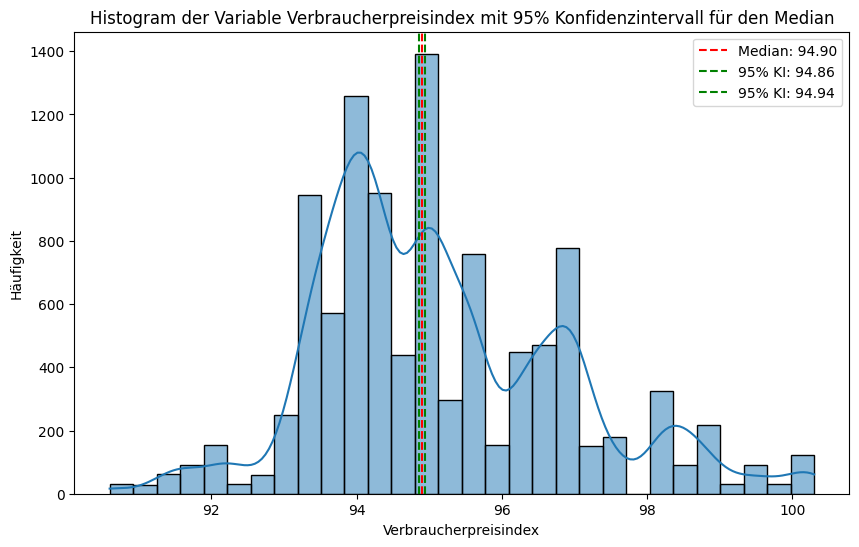

In [15]:
# Descriptive Statistics for Verbraucherpreisindex
print("Descriptive Statistics for Verbraucherpreisindex:")
desc = dataf['Verbraucherpreisindex'].describe()
print(desc)

# Berechnung des Medians
data_clean = dataf['Verbraucherpreisindex'].dropna().values
median = np.median(data_clean)

# Berechnung des Konfidenzintervalls für den Median
confidence_level = 0.95
z = stats.norm.ppf(1 - (1 - confidence_level) / 2)
n = len(data_clean)
se_median = 1.253 * (np.std(data_clean) / np.sqrt(n))
lower_ci = median - z * se_median
upper_ci = median + z * se_median

print(f"Median: {median}")
print(f"95% Confidence interval for the median: ({lower_ci}, {upper_ci})")

# Histogram für Verbraucherpreisindex mit Konfidenzintervall
plt.figure(figsize=(10, 6))
sns.histplot(data_clean, bins=30, kde=True)
plt.axvline(median, color='red', linestyle='--', label=f'Median: {median:.2f}')
plt.axvline(lower_ci, color='green', linestyle='--', label=f'95% KI: {lower_ci:.2f}')
plt.axvline(upper_ci, color='green', linestyle='--', label=f'95% KI: {upper_ci:.2f}')
plt.title('Histogram der Variable Verbraucherpreisindex mit 95% Konfidenzintervall für den Median')
plt.xlabel('Verbraucherpreisindex')
plt.ylabel('Häufigkeit')
plt.legend()
plt.show()

### Verbraucherpreisindex im zeitlichen Verlauf

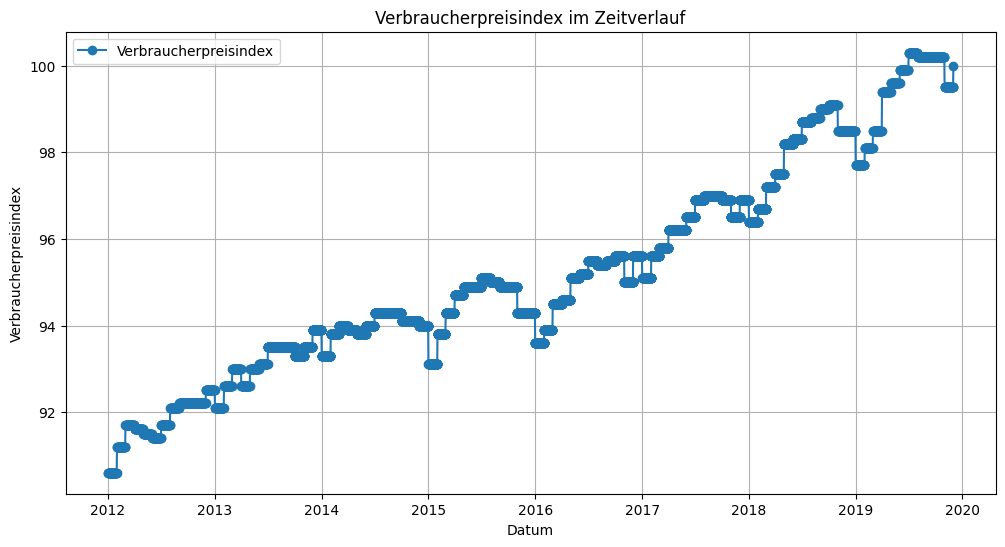

In [16]:
# Konvertiere die Datum-Spalte in ein datetime-Format
dataf['Datum'] = pd.to_datetime(dataf['Datum'])

# Setze die Datum-Spalte als Index, falls dies noch nicht geschehen ist
#dataf.set_index('Datum', inplace=True)

# Sortiere den DataFrame nach Datum
#dataf.sort_index(inplace=True)

# Plotten des Verbraucherpreisindex im Zeitverlauf
plt.figure(figsize=(12, 6))
plt.plot(dataf.index, dataf['Verbraucherpreisindex'], marker='o', linestyle='-', label='Verbraucherpreisindex')
plt.title('Verbraucherpreisindex im Zeitverlauf')
plt.xlabel('Datum')
plt.ylabel('Verbraucherpreisindex')
plt.legend()
plt.grid(True)
plt.show()

## Regen
Kategoriale Variable

Regen
0    5681
1    4756
Name: count, dtype: int64
Regen
0    0.544314
1    0.455686
Name: proportion, dtype: float64
{0: (0.5347587818342441, 0.5538682182615688), 1: (0.4461317817384311, 0.465241218165756)}


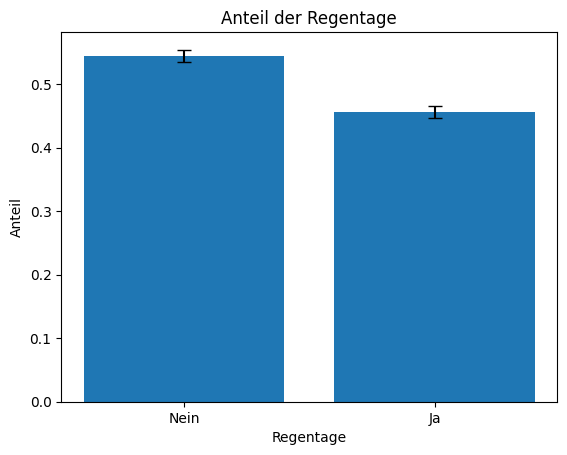

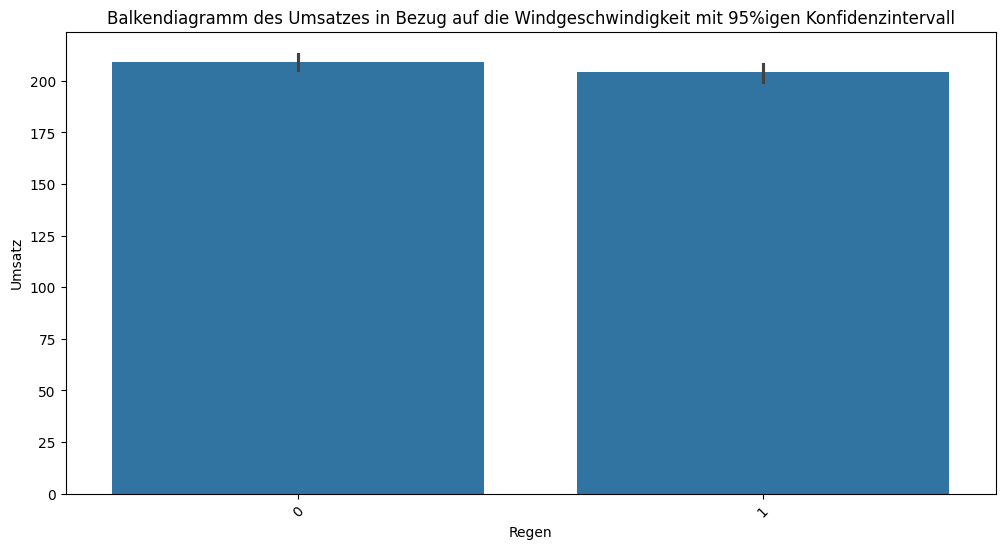

In [28]:
# Regen - Kategorielle Variable

# Count of each category
kategorie_anzahl = dataf['Regen'].value_counts()

# Proportion of each category
kategorie_anteil = dataf['Regen'].value_counts(normalize=True)

print(kategorie_anzahl)
print(kategorie_anteil)
# Sample size
n = len(dataf)

# Z-score for 95% confidence
z = norm.ppf(0.975)

# Confidence intervals for proportions
konfidenzintervalle = {}
for kategorie, anzahl in kategorie_anzahl.items():
    p = anzahl / n
    se = np.sqrt(p * (1 - p) / n)
    ci = (p - z * se, p + z * se)
    konfidenzintervalle[kategorie] = ci

print(konfidenzintervalle)
# Prepare data for plotting
categories = kategorie_anzahl.index
counts = kategorie_anzahl.values
proportions = kategorie_anteil.values
error_bars = [konfidenzintervalle[kategorie][1] - konfidenzintervalle[kategorie][0] for kategorie in categories]

# Create bar plot with error bars
fig, ax = plt.subplots()
bars = ax.bar(categories, proportions, yerr=[(upper - prop, prop - lower) for prop, (lower, upper) in zip(proportions, konfidenzintervalle.values())], capsize=5)

# Label the plot
ax.set_xlabel('Regentage')
ax.set_ylabel('Anteil')
ax.set_title('Anteil der Regentage')

# Ensure x-axis treats categories as discrete labels
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)
ax.set_xticklabels(['Nein', 'Ja'])
plt.show()


# Darstellung der Variable Windgeschwindigkeit in Relation zum Umsatz als Balkendiagramm mit 95% Konfidenzintervall
plt.figure(figsize=(12, 6))
# Plotten des Umsatzes mit Windgeschwindigkeit mit KI
sns.barplot(x='Regen', y='Umsatz', data=dataf, errorbar=('ci', 95))

plt.title('Balkendiagramm des Umsatzes in Bezug auf die Windgeschwindigkeit mit 95%igen Konfidenzintervall')
plt.xlabel('Regen')
plt.ylabel('Umsatz')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

## Schnee
Kategorielle Variable

Schnee
0    9669
1     768
Name: count, dtype: int64
Schnee
0    0.926416
1    0.073584
Name: proportion, dtype: float64
{0: (0.9214065798821817, 0.9314246934722304), 1: (0.06857530652776953, 0.07859342011781828)}


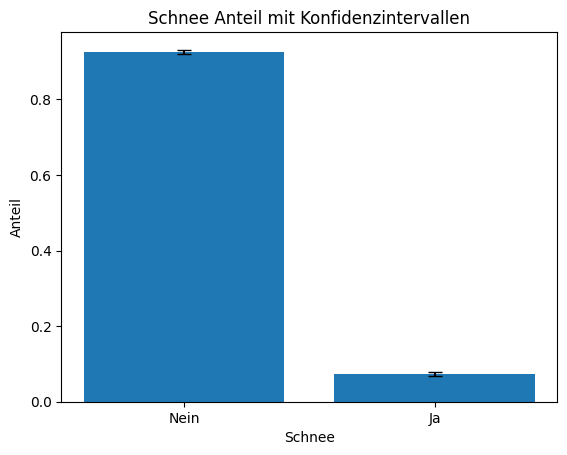

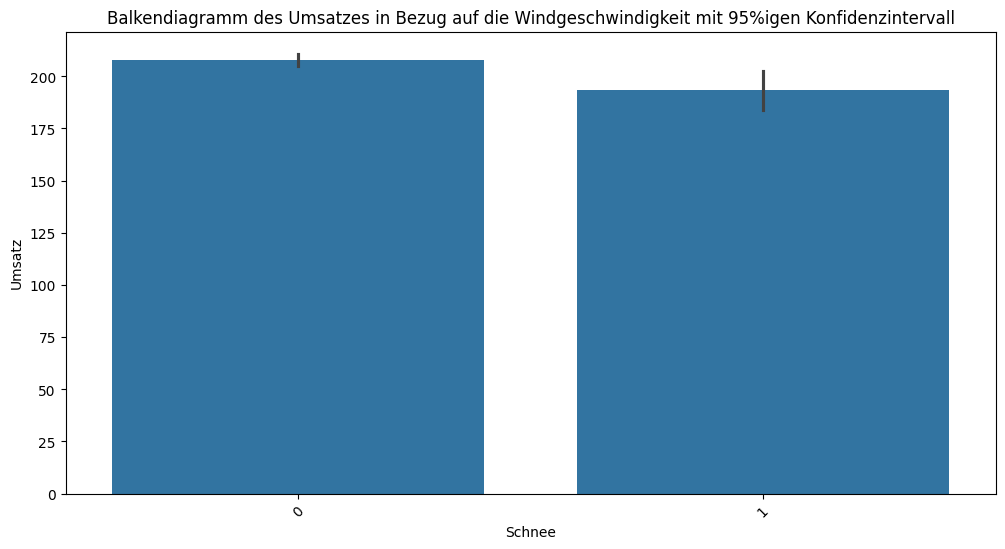

In [29]:
# Schnee - Kategorielle Variable
# Count of each category
kategorie_anzahl = dataf['Schnee'].value_counts()

# Proportion of each category
kategorie_anteil = dataf['Schnee'].value_counts(normalize=True)

print(kategorie_anzahl)
print(kategorie_anteil)
# Sample size
n = len(dataf)

# Z-score for 95% confidence
z = norm.ppf(0.975)

# Confidence intervals for proportions
konfidenzintervalle = {}
for kategorie, anzahl in kategorie_anzahl.items():
    p = anzahl / n
    se = np.sqrt(p * (1 - p) / n)
    ci = (p - z * se, p + z * se)
    konfidenzintervalle[kategorie] = ci

print(konfidenzintervalle)
# Prepare data for plotting
categories = kategorie_anzahl.index
counts = kategorie_anzahl.values
proportions = kategorie_anteil.values
error_bars = [konfidenzintervalle[kategorie][1] - konfidenzintervalle[kategorie][0] for kategorie in categories]

# Create bar plot with error bars
fig, ax = plt.subplots()
bars = ax.bar(categories, proportions, yerr=[(upper - prop, prop - lower) for prop, (lower, upper) in zip(proportions, konfidenzintervalle.values())], capsize=5)

# Label the plot
ax.set_xlabel('Schnee')
ax.set_ylabel('Anteil')
ax.set_title('Schnee Anteil mit Konfidenzintervallen')

# Ensure x-axis treats categories as discrete labels
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)
ax.set_xticklabels(['Nein', 'Ja'])
plt.show()


# Darstellung der Variable Windgeschwindigkeit in Relation zum Umsatz als Balkendiagramm mit 95% Konfidenzintervall
plt.figure(figsize=(12, 6))
# Plotten des Umsatzes mit Windgeschwindigkeit mit KI
sns.barplot(x='Schnee', y='Umsatz', data=dataf, errorbar=('ci', 95))

plt.title('Balkendiagramm des Umsatzes in Bezug auf die Windgeschwindigkeit mit 95%igen Konfidenzintervall')
plt.xlabel('Schnee')
plt.ylabel('Umsatz')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

## Ferientage in Schleswig Holstein
Kategorielle Variable

FerienSH
0.0    7974
1.0    2425
Name: count, dtype: int64
FerienSH
0.0    0.766805
1.0    0.233195
Name: proportion, dtype: float64
{0.0: (0.7558664507072133, 0.772158843917679), 1.0: (0.22424411142743436, 0.2404488079938553)}


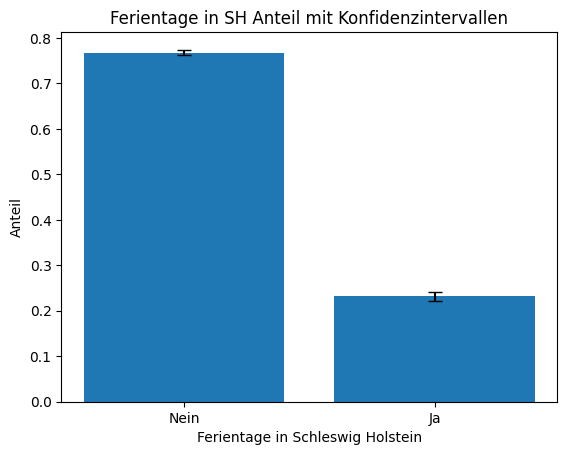

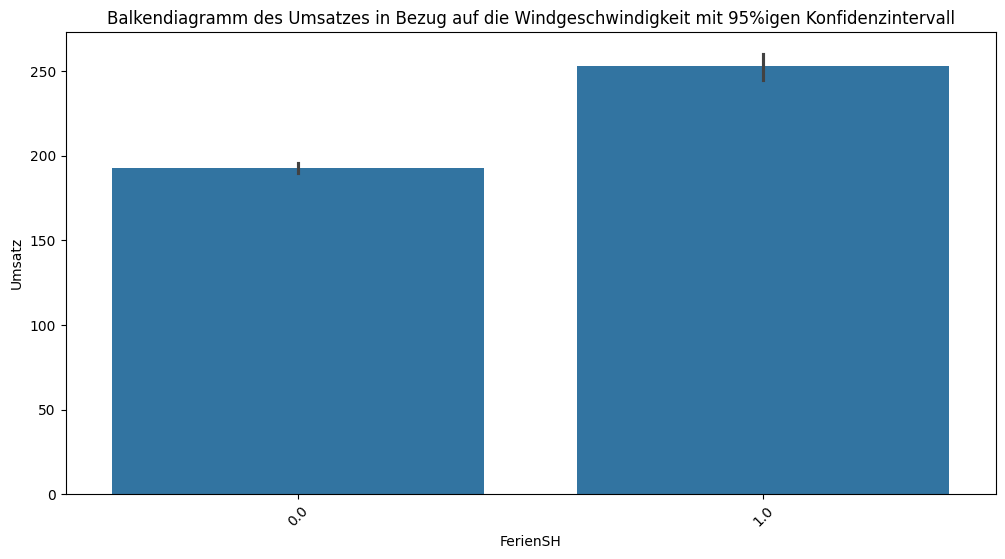

In [30]:
# Ferien SH

# Count of each category
kategorie_anzahl = dataf['FerienSH'].value_counts()

# Proportion of each category
kategorie_anteil = dataf['FerienSH'].value_counts(normalize=True)

print(kategorie_anzahl)
print(kategorie_anteil)
# Sample size
n = len(dataf)

# Z-score for 95% confidence
z = norm.ppf(0.975)

# Confidence intervals for proportions
konfidenzintervalle = {}
for kategorie, anzahl in kategorie_anzahl.items():
    p = anzahl / n
    se = np.sqrt(p * (1 - p) / n)
    ci = (p - z * se, p + z * se)
    konfidenzintervalle[kategorie] = ci

print(konfidenzintervalle)
# Prepare data for plotting
categories = kategorie_anzahl.index
counts = kategorie_anzahl.values
proportions = kategorie_anteil.values
error_bars = [konfidenzintervalle[kategorie][1] - konfidenzintervalle[kategorie][0] for kategorie in categories]

# Create bar plot with error bars
fig, ax = plt.subplots()
bars = ax.bar(categories, proportions, yerr=[(upper - prop, prop - lower) for prop, (lower, upper) in zip(proportions, konfidenzintervalle.values())], capsize=5)

# Label the plot
ax.set_xlabel('Ferientage in Schleswig Holstein')
ax.set_ylabel('Anteil')
ax.set_title('Ferientage in SH Anteil mit Konfidenzintervallen')

# Ensure x-axis treats categories as discrete labels
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)
ax.set_xticklabels(['Nein', 'Ja'])
plt.show()


# Darstellung der Variable Windgeschwindigkeit in Relation zum Umsatz als Balkendiagramm mit 95% Konfidenzintervall
plt.figure(figsize=(12, 6))
# Plotten des Umsatzes mit Windgeschwindigkeit mit KI
sns.barplot(x='FerienSH', y='Umsatz', data=dataf, errorbar=('ci', 95))

plt.title('Balkendiagramm des Umsatzes in Bezug auf die Windgeschwindigkeit mit 95%igen Konfidenzintervall')
plt.xlabel('FerienSH')
plt.ylabel('Umsatz')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

## Feiertage
Kategorielle Variable

Feiertag
0.0    10165
1.0      234
Name: count, dtype: int64
Feiertag
0.0    0.977498
1.0    0.022502
Name: proportion, dtype: float64
{0.0: (0.97088238322277, 0.9769953594235843), 1.0: (0.019579986554432337, 0.0252604848453952)}


ValueError: 'yerr' must not contain negative values

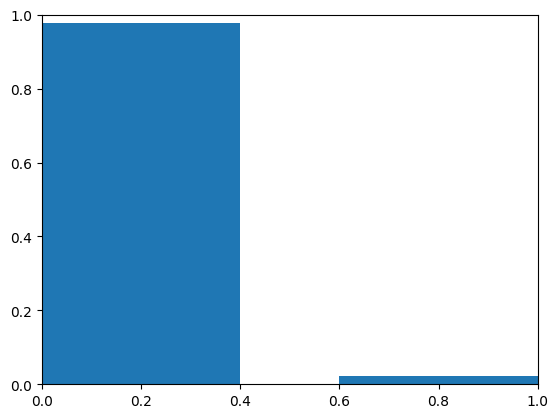

In [31]:
# Feiertage

# Count of each category
kategorie_anzahl = dataf['Feiertag'].value_counts()

# Proportion of each category
kategorie_anteil = dataf['Feiertag'].value_counts(normalize=True)

print(kategorie_anzahl)
print(kategorie_anteil)
# Sample size
n = len(dataf)

# Z-score for 95% confidence
z = norm.ppf(0.975)

# Confidence intervals for proportions
konfidenzintervalle = {}
for kategorie, anzahl in kategorie_anzahl.items():
    p = anzahl / n
    se = np.sqrt(p * (1 - p) / n)
    ci = (p - z * se, p + z * se)
    konfidenzintervalle[kategorie] = ci

print(konfidenzintervalle)
# Prepare data for plotting
categories = kategorie_anzahl.index
counts = kategorie_anzahl.values
proportions = kategorie_anteil.values
error_bars = [konfidenzintervalle[kategorie][1] - konfidenzintervalle[kategorie][0] for kategorie in categories]

# Create bar plot with error bars
fig, ax = plt.subplots()
bars = ax.bar(categories, proportions, yerr=[(upper - prop, prop - lower) for prop, (lower, upper) in zip(proportions, konfidenzintervalle.values())], capsize=5)

# Label the plot
ax.set_xlabel('Feiertage')
ax.set_ylabel('Anteil')
ax.set_title('Feiertage Anteil mit Konfidenzintervallen')

# Ensure x-axis treats categories as discrete labels
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)
ax.set_xticklabels(['Nein', 'Ja'])
plt.show()


# Darstellung der Variable Windgeschwindigkeit in Relation zum Umsatz als Balkendiagramm mit 95% Konfidenzintervall
plt.figure(figsize=(12, 6))
# Plotten des Umsatzes mit Windgeschwindigkeit mit KI
sns.barplot(x='Feiertage', y='Umsatz', data=dataf, errorbar=('ci', 95))

plt.title('Balkendiagramm des Umsatzes in Bezug auf die Windgeschwindigkeit mit 95%igen Konfidenzintervall')
plt.xlabel('Feiertage')
plt.ylabel('Umsatz')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

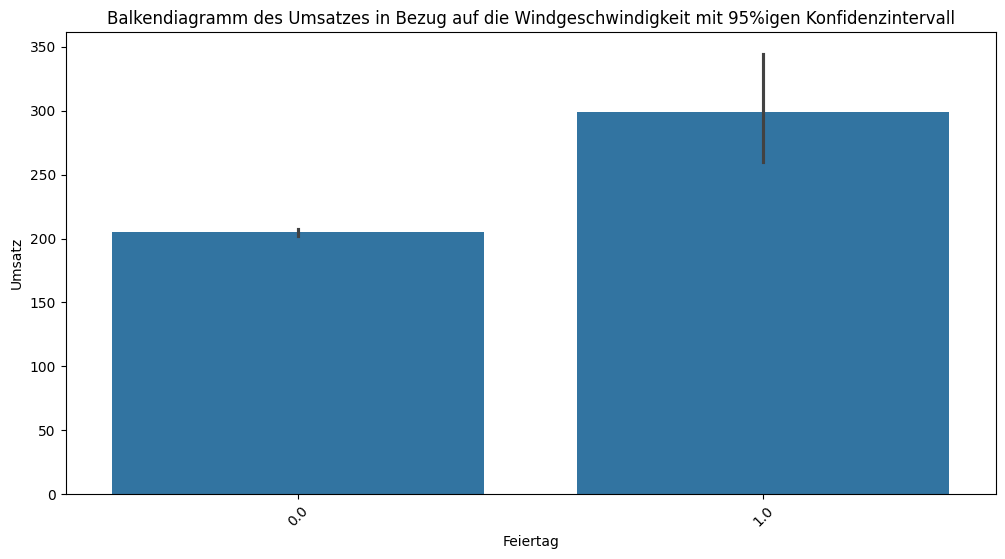

In [33]:
# Darstellung der Variable Windgeschwindigkeit in Relation zum Umsatz als Balkendiagramm mit 95% Konfidenzintervall
plt.figure(figsize=(12, 6))
# Plotten des Umsatzes mit Windgeschwindigkeit mit KI
sns.barplot(x='Feiertag', y='Umsatz', data=dataf, errorbar=('ci', 95))

plt.title('Balkendiagramm des Umsatzes in Bezug auf die Windgeschwindigkeit mit 95%igen Konfidenzintervall')
plt.xlabel('Feiertag')
plt.ylabel('Umsatz')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

## Weihnachtsmarkt
Kategorielle Variable

Weihnachtsmarkt
0    9533
1     904
Name: count, dtype: int64
Weihnachtsmarkt
0    0.913385
1    0.086615
Name: proportion, dtype: float64
{0: (0.9079889277554173, 0.918781216922172), 1: (0.08121878307782794, 0.0920110722445827)}


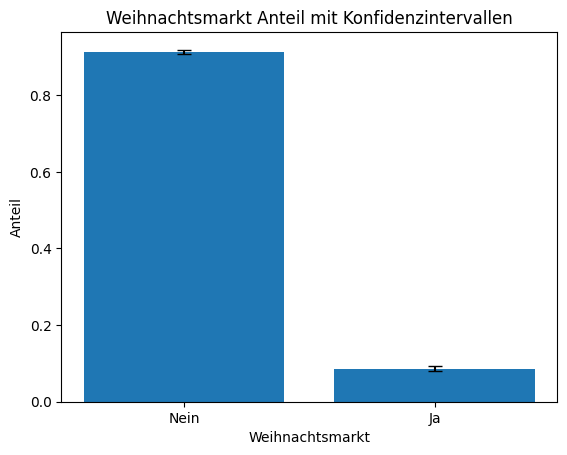

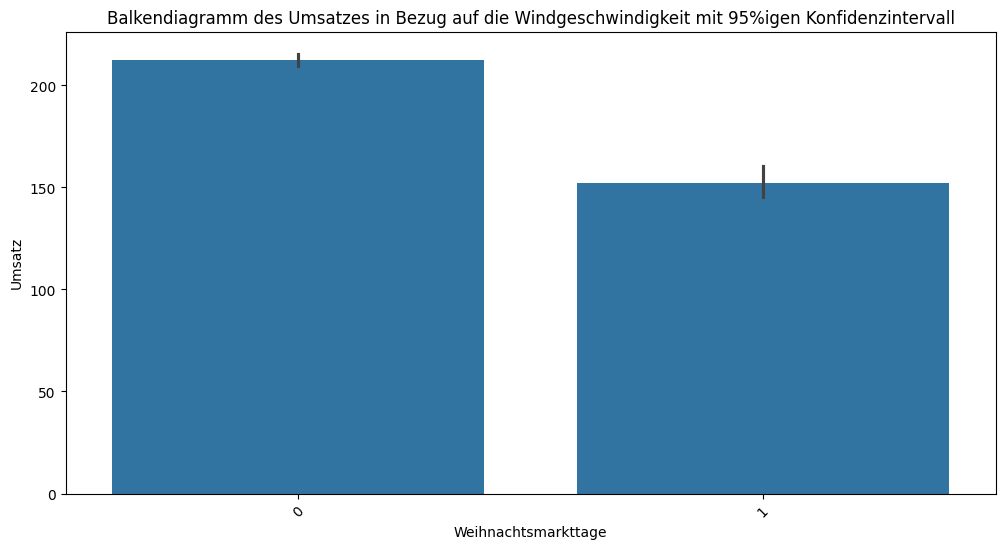

In [34]:
# Weihnachtsmarkt - Kategorielle Variable
# Count of each category
kategorie_anzahl = dataf['Weihnachtsmarkt'].value_counts()

# Proportion of each category
kategorie_anteil = dataf['Weihnachtsmarkt'].value_counts(normalize=True)

print(kategorie_anzahl)
print(kategorie_anteil)
# Sample size
n = len(dataf)

# Z-score for 95% confidence
z = norm.ppf(0.975)

# Confidence intervals for proportions
konfidenzintervalle = {}
for kategorie, anzahl in kategorie_anzahl.items():
    p = anzahl / n
    se = np.sqrt(p * (1 - p) / n)
    ci = (p - z * se, p + z * se)
    konfidenzintervalle[kategorie] = ci

print(konfidenzintervalle)
# Prepare data for plotting
categories = kategorie_anzahl.index
counts = kategorie_anzahl.values
proportions = kategorie_anteil.values
error_bars = [konfidenzintervalle[kategorie][1] - konfidenzintervalle[kategorie][0] for kategorie in categories]

# Create bar plot with error bars
fig, ax = plt.subplots()
bars = ax.bar(categories, proportions, yerr=[(upper - prop, prop - lower) for prop, (lower, upper) in zip(proportions, konfidenzintervalle.values())], capsize=5)

# Label the plot
ax.set_xlabel('Weihnachtsmarkt')
ax.set_ylabel('Anteil')
ax.set_title('Weihnachtsmarkt Anteil mit Konfidenzintervallen')

# Ensure x-axis treats categories as discrete labels
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)
ax.set_xticklabels(['Nein', 'Ja'])
plt.show()


# Darstellung der Variable Windgeschwindigkeit in Relation zum Umsatz als Balkendiagramm mit 95% Konfidenzintervall
plt.figure(figsize=(12, 6))
# Plotten des Umsatzes mit Windgeschwindigkeit mit KI
sns.barplot(x='Weihnachtsmarkt', y='Umsatz', data=dataf, errorbar=('ci', 95))

plt.title('Balkendiagramm des Umsatzes in Bezug auf die Windgeschwindigkeit mit 95%igen Konfidenzintervall')
plt.xlabel('Weihnachtsmarkttage')
plt.ylabel('Umsatz')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

## Umschlag
Kategorielle Variable

Umschlag
0    10333
1      104
Name: count, dtype: int64
Umschlag
0    0.990035
1    0.009965
Name: proportion, dtype: float64
{0: (0.9881299266811393, 0.9919409749189373), 1: (0.008059025081062682, 0.011870073318860669)}


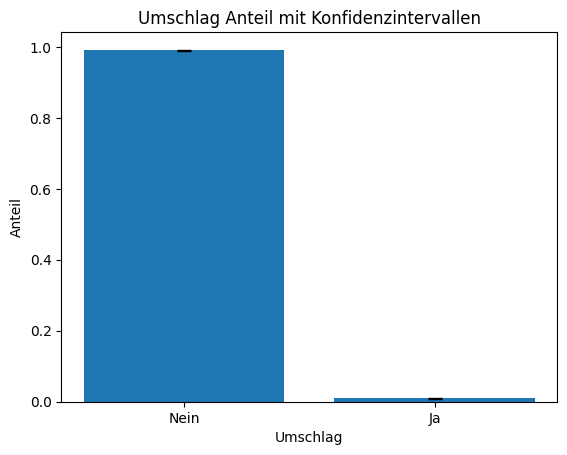

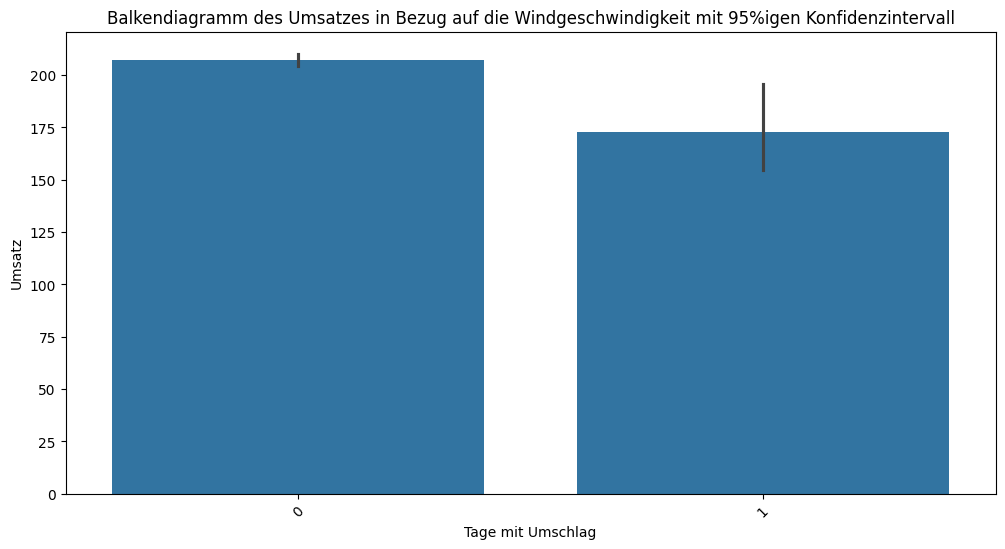

In [35]:
# Umschlag
# Count of each category
kategorie_anzahl = dataf['Umschlag'].value_counts()

# Proportion of each category
kategorie_anteil = dataf['Umschlag'].value_counts(normalize=True)

print(kategorie_anzahl)
print(kategorie_anteil)
# Sample size
n = len(dataf)

# Z-score for 95% confidence
z = norm.ppf(0.975)

# Confidence intervals for proportions
konfidenzintervalle = {}
for kategorie, anzahl in kategorie_anzahl.items():
    p = anzahl / n
    se = np.sqrt(p * (1 - p) / n)
    ci = (p - z * se, p + z * se)
    konfidenzintervalle[kategorie] = ci

print(konfidenzintervalle)
# Prepare data for plotting
categories = kategorie_anzahl.index
counts = kategorie_anzahl.values
proportions = kategorie_anteil.values
error_bars = [konfidenzintervalle[kategorie][1] - konfidenzintervalle[kategorie][0] for kategorie in categories]

# Create bar plot with error bars
fig, ax = plt.subplots()
bars = ax.bar(categories, proportions, yerr=[(upper - prop, prop - lower) for prop, (lower, upper) in zip(proportions, konfidenzintervalle.values())], capsize=5)

# Label the plot
ax.set_xlabel('Umschlag')
ax.set_ylabel('Anteil')
ax.set_title('Umschlag Anteil mit Konfidenzintervallen')

# Ensure x-axis treats categories as discrete labels
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)
ax.set_xticklabels(['Nein', 'Ja'])
plt.show()

# Darstellung der Variable Windgeschwindigkeit in Relation zum Umsatz als Balkendiagramm mit 95% Konfidenzintervall
plt.figure(figsize=(12, 6))
# Plotten des Umsatzes mit Windgeschwindigkeit mit KI
sns.barplot(x='Umschlag', y='Umsatz', data=dataf, errorbar=('ci', 95))

plt.title('Balkendiagramm des Umsatzes in Bezug auf die Windgeschwindigkeit mit 95%igen Konfidenzintervall')
plt.xlabel('Tage mit Umschlag')
plt.ylabel('Umsatz')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

## THW Heimspiele

THW_heimspiel
0    9981
1     456
Name: count, dtype: int64
THW_heimspiel
0    0.956309
1    0.043691
Name: proportion, dtype: float64
{0: (0.952387768063534, 0.9602308004906484), 1: (0.03976919950935168, 0.04761223193646609)}


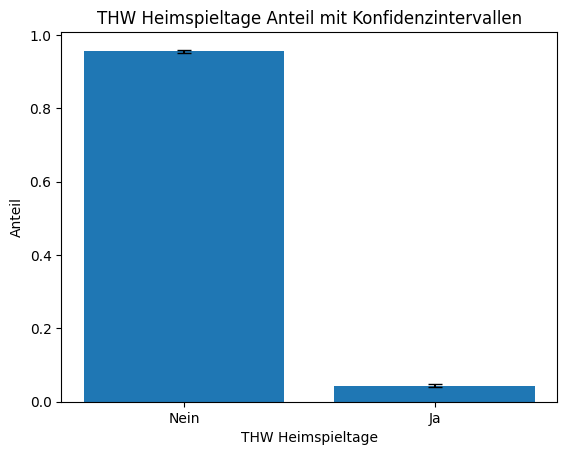

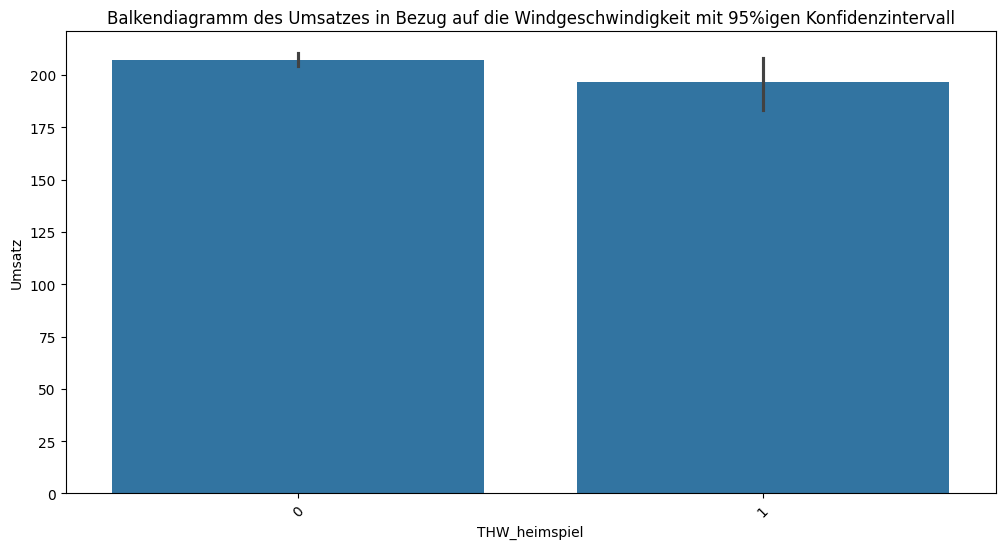

In [36]:
# THW Daten # ergibt so natürlich gar keinen Sinn

# Count of each category
kategorie_anzahl = dataf['THW_heimspiel'].value_counts()

# Proportion of each category
kategorie_anteil = dataf['THW_heimspiel'].value_counts(normalize=True)

print(kategorie_anzahl)
print(kategorie_anteil)
# Sample size
n = len(dataf)

# Z-score for 95% confidence
z = norm.ppf(0.975)

# Confidence intervals for proportions
konfidenzintervalle = {}
for kategorie, anzahl in kategorie_anzahl.items():
    p = anzahl / n
    se = np.sqrt(p * (1 - p) / n)
    ci = (p - z * se, p + z * se)
    konfidenzintervalle[kategorie] = ci

print(konfidenzintervalle)
# Prepare data for plotting
categories = kategorie_anzahl.index
counts = kategorie_anzahl.values
proportions = kategorie_anteil.values
error_bars = [konfidenzintervalle[kategorie][1] - konfidenzintervalle[kategorie][0] for kategorie in categories]

# Create bar plot with error bars
fig, ax = plt.subplots()
bars = ax.bar(categories, proportions, yerr=[(upper - prop, prop - lower) for prop, (lower, upper) in zip(proportions, konfidenzintervalle.values())], capsize=5)

# Label the plot
ax.set_xlabel('THW Heimspieltage')
ax.set_ylabel('Anteil')
ax.set_title('THW Heimspieltage Anteil mit Konfidenzintervallen')

# Ensure x-axis treats categories as discrete labels
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories)
ax.set_xticklabels(['Nein', 'Ja'])
plt.show()


# Darstellung der Variable Windgeschwindigkeit in Relation zum Umsatz als Balkendiagramm mit 95% Konfidenzintervall
plt.figure(figsize=(12, 6))
# Plotten des Umsatzes mit Windgeschwindigkeit mit KI
sns.barplot(x='THW_heimspiel', y='Umsatz', data=dataf, errorbar=('ci', 95))

plt.title('Balkendiagramm des Umsatzes in Bezug auf die Windgeschwindigkeit mit 95%igen Konfidenzintervall')
plt.xlabel('THW_heimspiel')
plt.ylabel('Umsatz')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

In [ ]:

## Aus meiner Homework  IN PROGRESS
# Histogram und Grundparameter Statistik für Wettervariablen erstellen
# Liste der Wettervariablen
#weather_variables = ['Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'Wettercode']

# Schleife über jede Wettervariable
#for var in weather_variables:
#    # Histogramm erstellen
#    plt.hist(merged_df[var], bins=10, color='skyblue', edgecolor='black')
#    plt.xlabel(var)
#    plt.ylabel('Häufigkeit')
#    plt.title(f'Histogramm der {var}')
#    plt.grid(True)
#    plt.show()
    
    # Grundlegende Parameter berechnen
#    mean_var = merged_df[var].mean()
#    median_var = merged_df[var].median()
#    min_var = merged_df[var].min()
#    max_var = merged_df[var].max()
#    std_var = merged_df[var].std()
    
    # Statistische Grundparameter ausgeben
#    print(f"\nStatistische Grundparameter für {var}:")
#    print("Mittlerer Wert:", mean_var)
#    print("Median:", median_var)
#    print("Minimum:", min_var)
#    print("Maximum:", max_var)
#    print("Standardabweichung:", std_var)
#    print("-----------------------------")

UsageError: Cell magic `%%Python` not found.


# Korrelationsmatrixen zwischen den Variablen

In [ ]:
#KORRELATIONSMATRIX   - aus Lindas Data Praparation  IN PROGRESS

# Nicht-numerische und transformierte Spalten aus dem DataFrame entfernen
#drop_df = dataf.drop(['Wochentag', 'logUmsatz','asUmsatz', 'Beschreibung', 'Uhrzeit_x', 'Heim_Auswärts_x', 'Uhrzeit_y', 'Heim_Auswärts_y'], axis=1)

# Korrelationsmatrix berechnen
#corr_matrix = drop_df.corr()

# Korrelationsmatrix plotten
#plt.figure(figsize=(10, 8))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
#plt.title('Korrelationsmatrix')
#plt.show()

In [6]:
dataf.dtypes

Datum                      object
KielerWoche              category
Warengruppe              category
Umsatz                    float64
Bewoelkung                float64
Temperatur                float64
Windgeschwindigkeit       float64
Wettercode                float64
Beschreibung               object
FerienSH                 category
Feiertag                 category
Uhrzeit                    object
Heim_Auswärts              object
Umschlag                 category
Weihnachtsmarkt          category
Verbraucherpreisindex     float64
Regen                    category
Schnee                   category
Wochentag_MDMDFSS        category
Wochenende               category
Jahreszeit_FSHW          category
Temperatur_Kategorie       object
THW_heimspiel            category
dtype: object

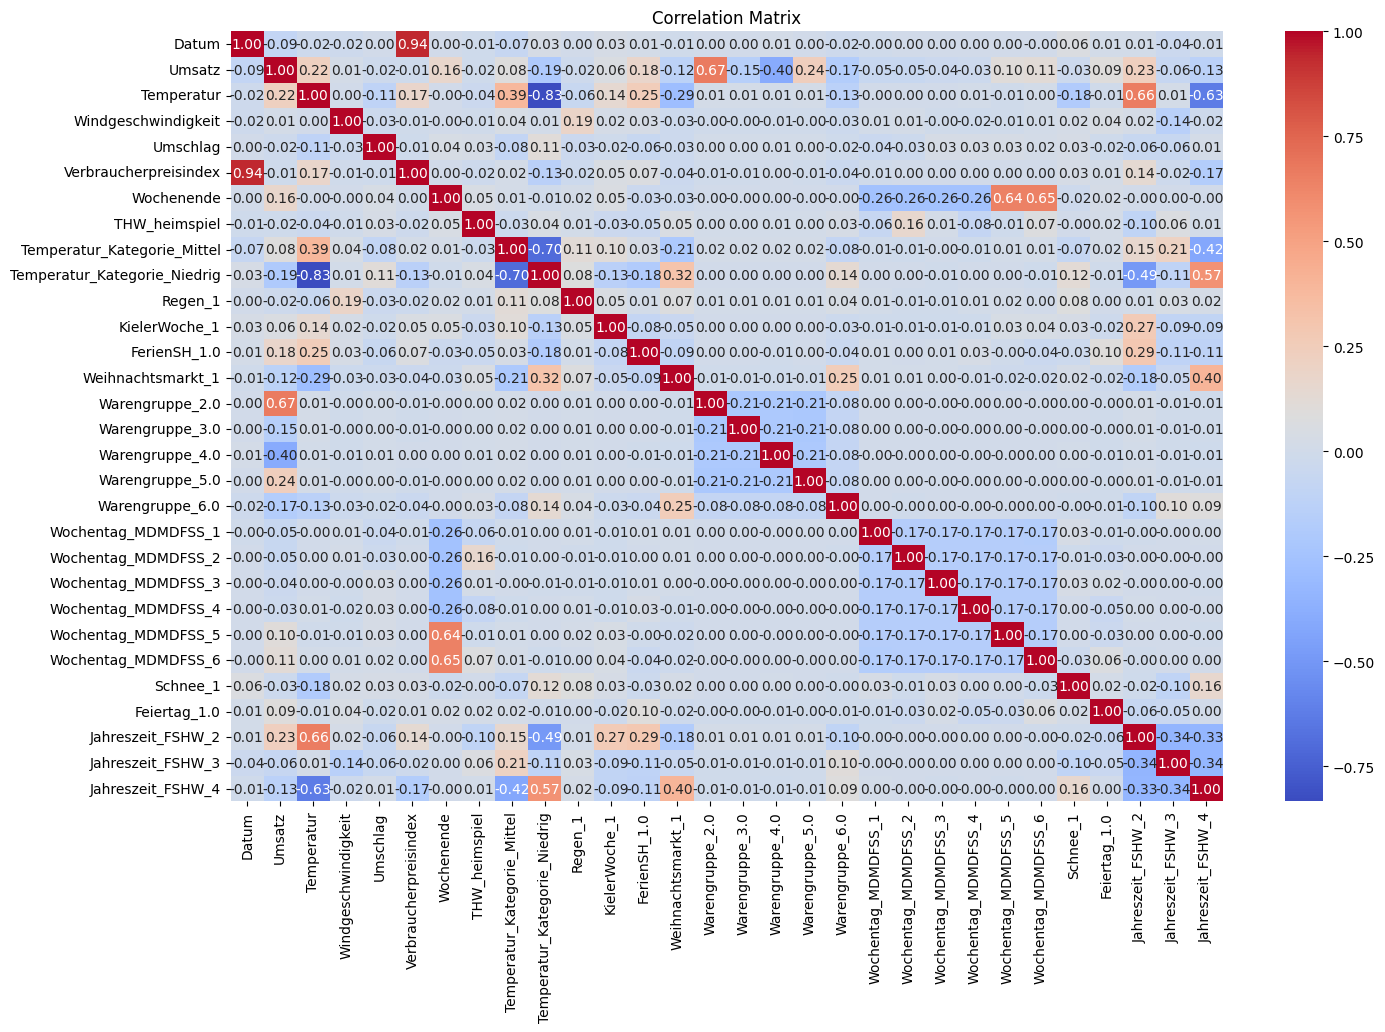

In [11]:
# Korrelationsmatrix
dataf['Datum'] = pd.to_datetime(dataf['Datum'])


# Encode categorical variables
#dataf = pd.get_dummies(dataf, columns=['Temperatur_Kategorie', 'Regen', 'KielerWoche', 'FerienSH', 'Weihnachtsmarkt', 'Warengruppe','Wochentag_MDMDFSS', 'Schnee', 'Feiertag', 'Jahreszeit_FSHW'], drop_first=True)


dataf1 = dataf.drop(columns=['Bewoelkung', 'Wettercode', 'Beschreibung', 'Uhrzeit', 'Heim_Auswärts'])

# Calculate the correlation matrix
correlation_matrix = dataf1.corr()

# Visualize the correlation matrix
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Missing Values  Darstellung für spätere Missing Values Imoutation

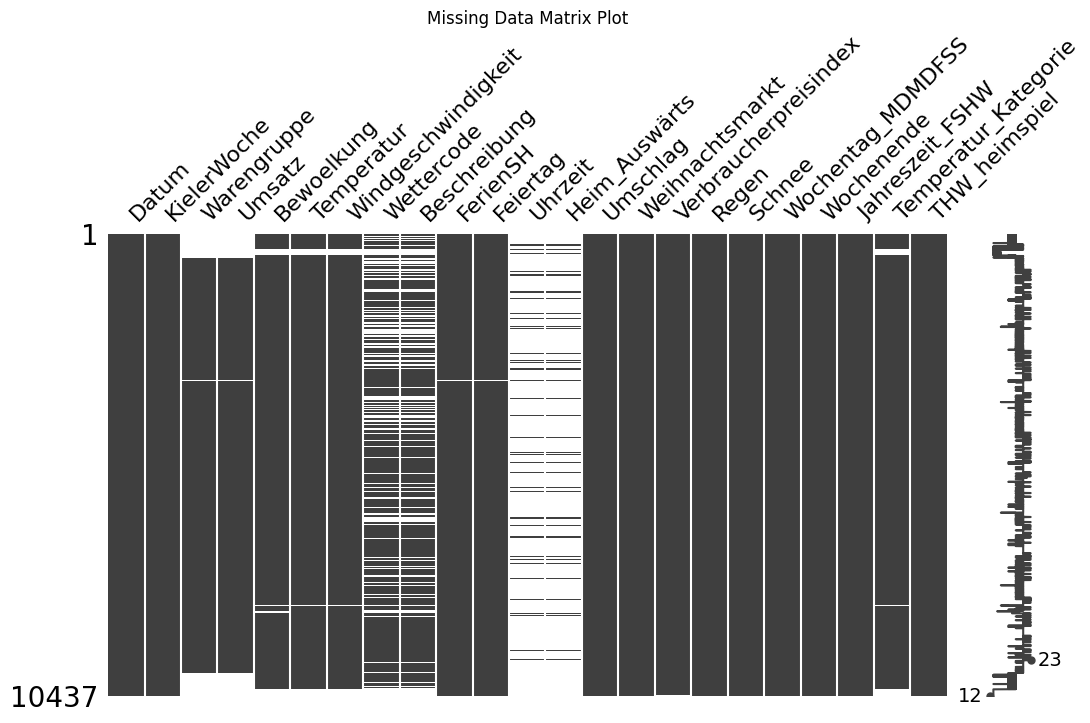

In [14]:
# Matrix plot of missing data
msno.matrix(dataf, figsize=(12, 6))
plt.title('Missing Data Matrix Plot')
plt.show()

/home/codespace/.python/current/lib/python3.10/site-packages/missingno/missingno.py:271: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)


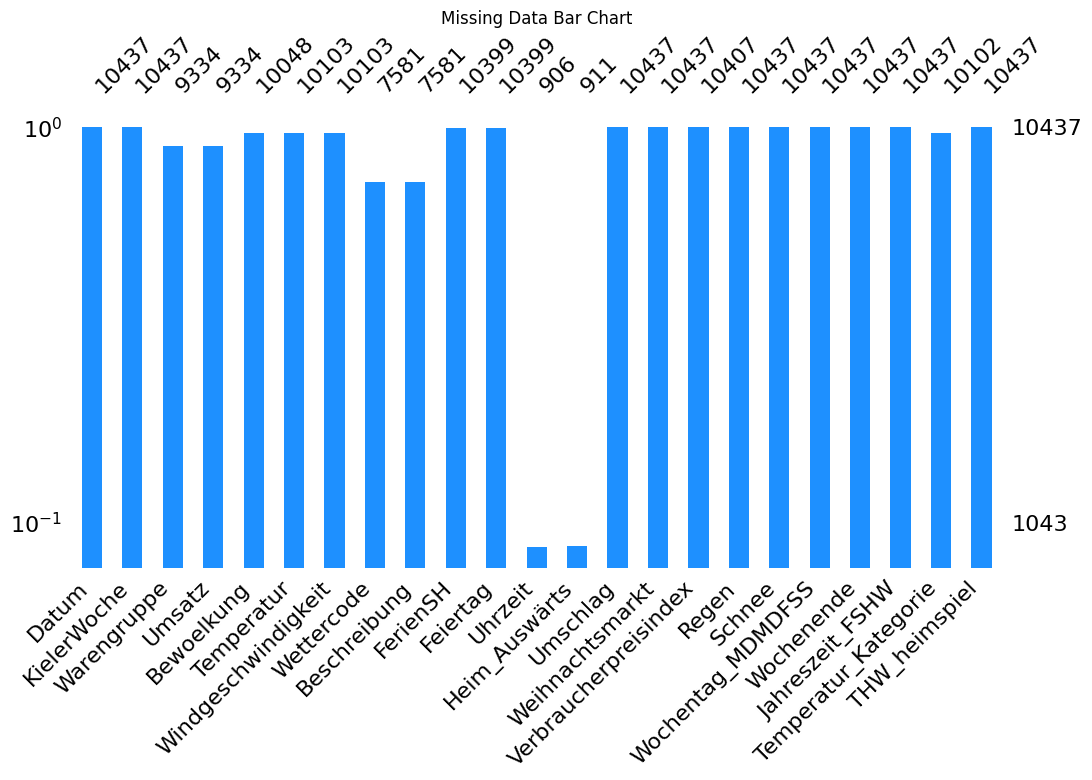

In [15]:
# Bar plot of missing data
msno.bar(dataf, color="dodgerblue", log=True, figsize=(12, 6))
plt.title('Missing Data Bar Chart')
plt.show()

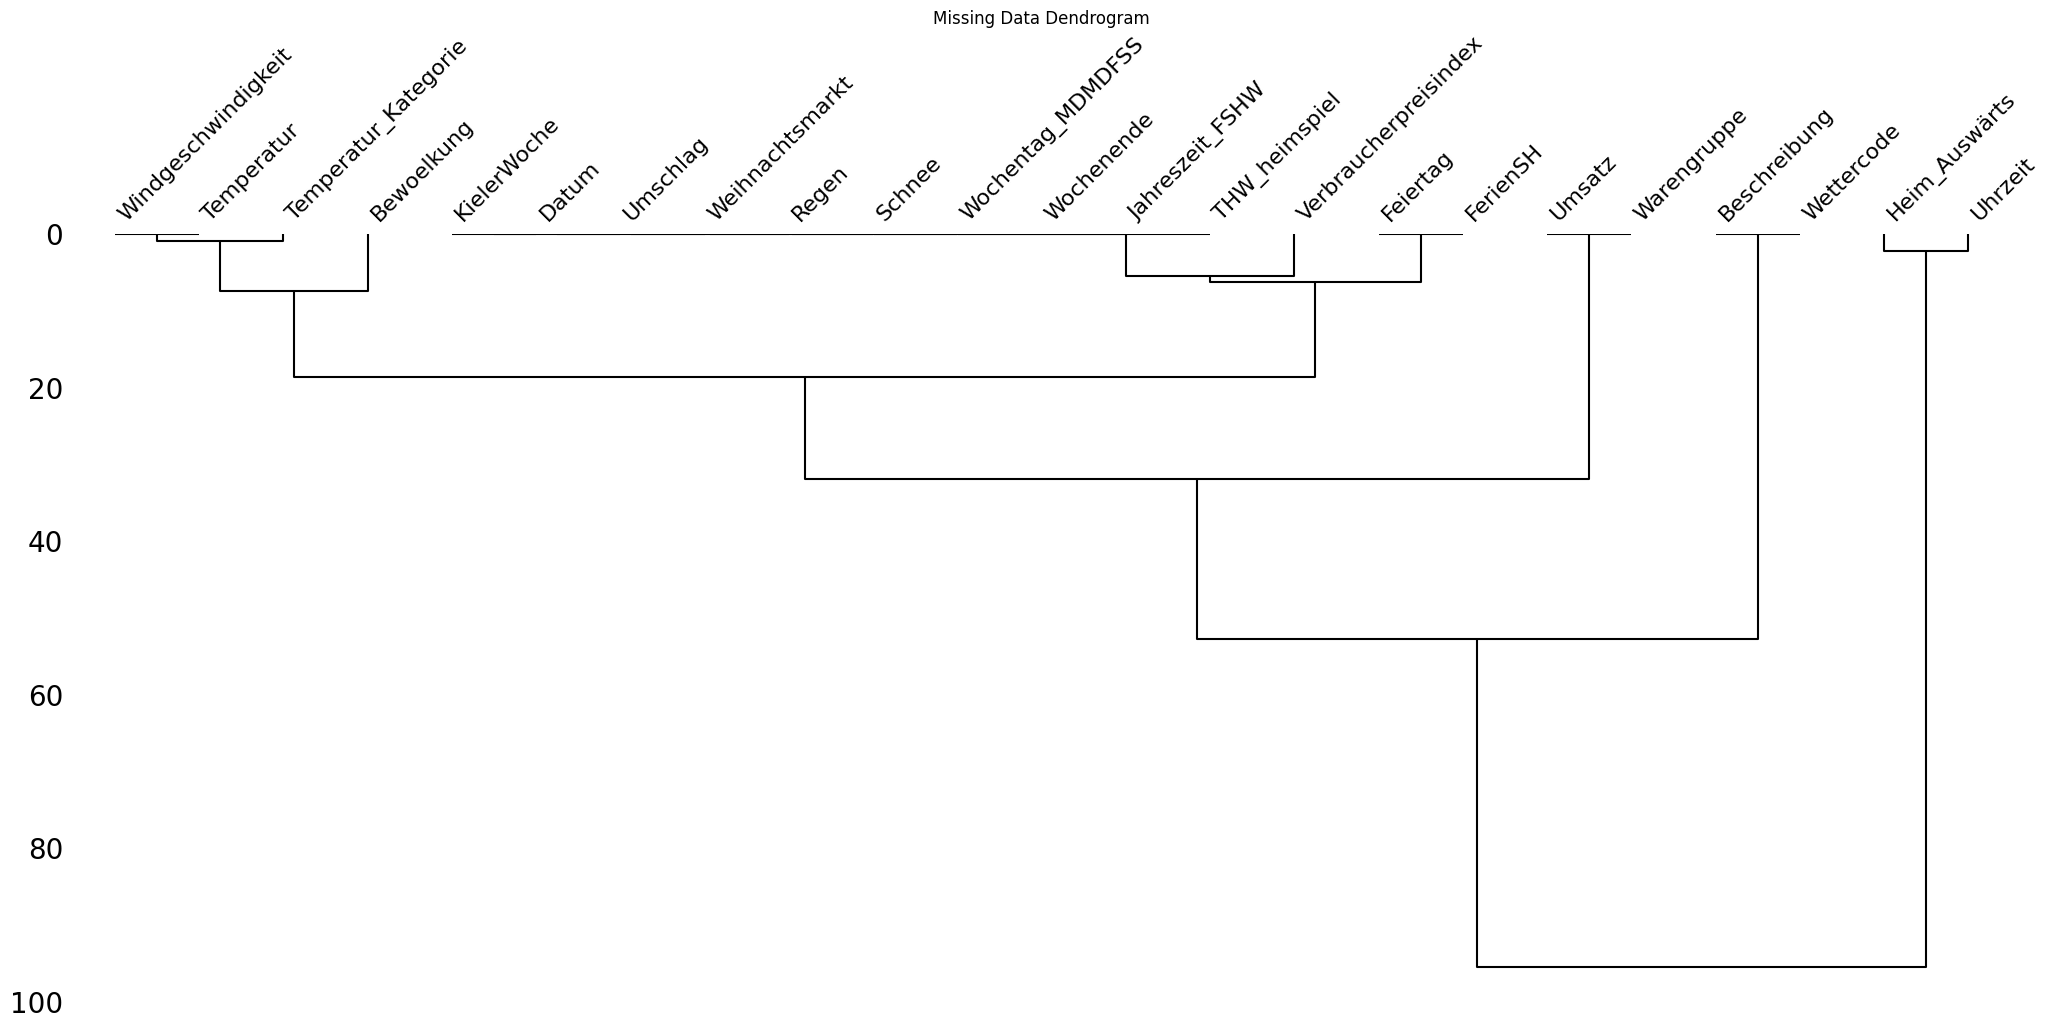

In [16]:

# Dendrogram to visualize the correlation of missingness between variables
msno.dendrogram(dataf)
plt.title('Missing Data Dendrogram')
plt.show()